<a href="https://colab.research.google.com/github/kjedrzejczak/parkinson_disease/blob/main/Parkinson_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset downloaded from Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis?select=parkinsons_disease_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df_parkinson = pd.read_csv('/content/drive/MyDrive/parkinson_dataset/parkinsons_disease_data.csv')
df_raw = df_parkinson.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_parkinson.head(2)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid


In [4]:
df_parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [5]:
nu = df_parkinson.isnull().sum().T
nu

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [6]:
df_parkinson.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_parkinson['Diagnosis'].value_counts()

,count
Diagnosis,
1,1304
0,801


# Value distributions for numerical values (No Parkinson + Parkinson disease) 👈

Age
No Parkinson


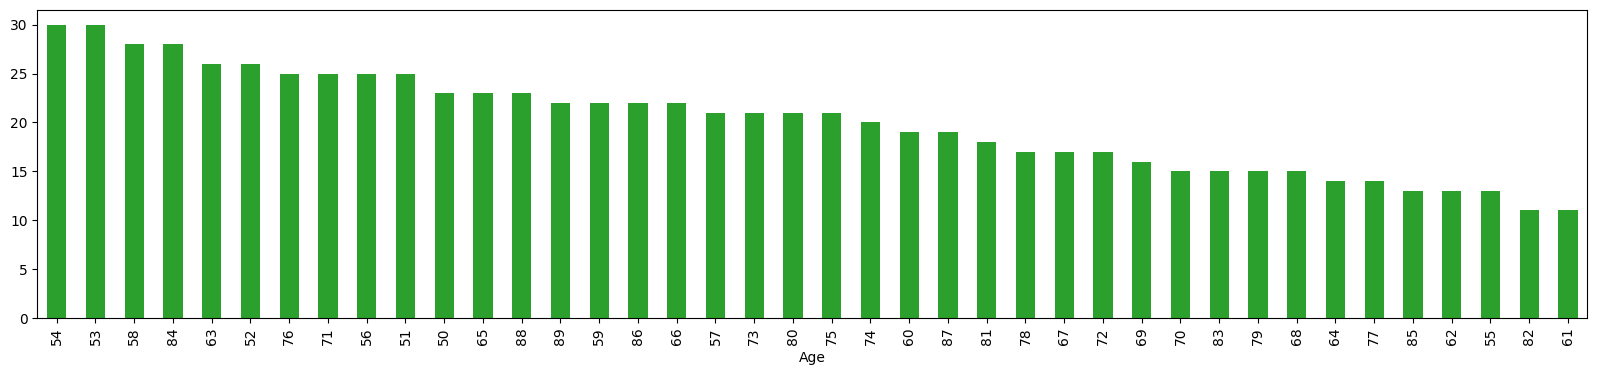

Diognised Parkinson disease


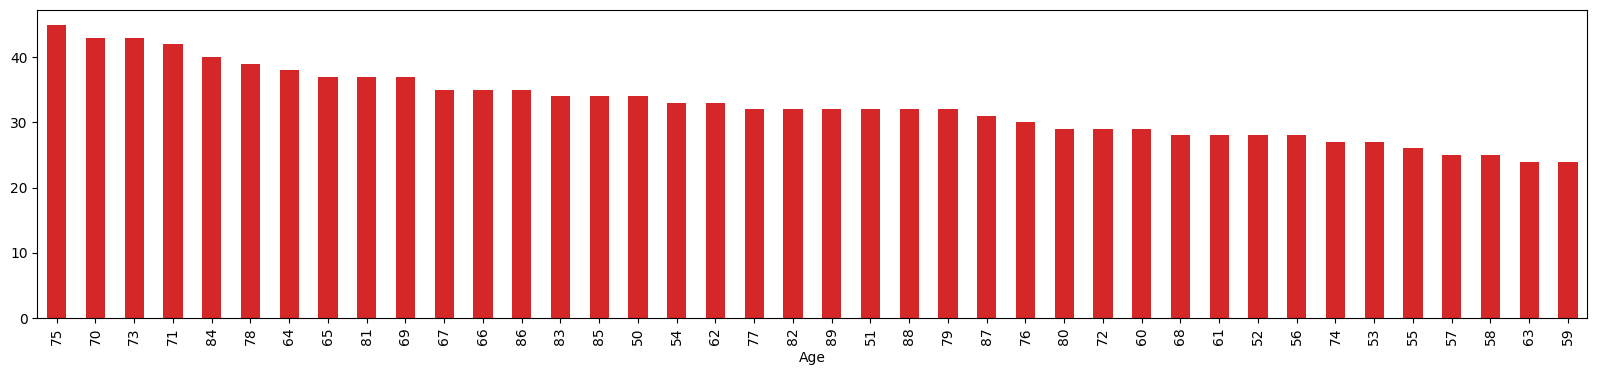







Gender
No Parkinson


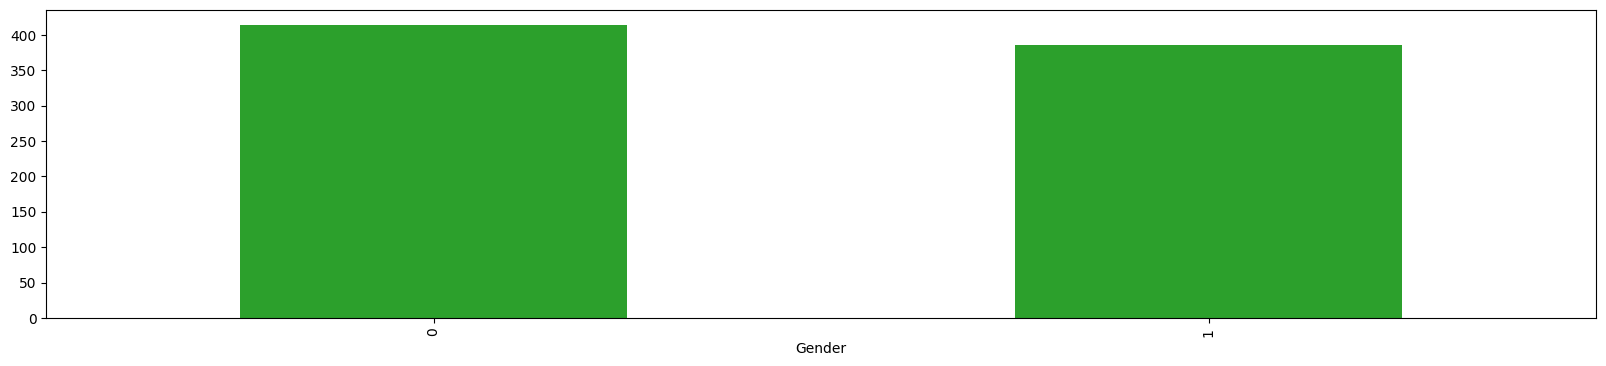

Diognised Parkinson disease


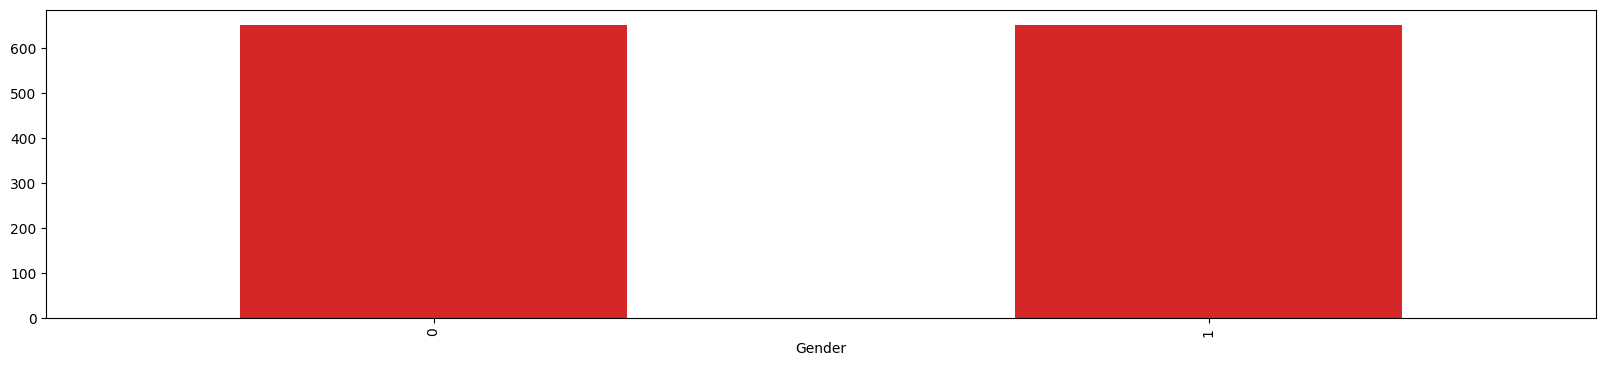







Ethnicity
No Parkinson


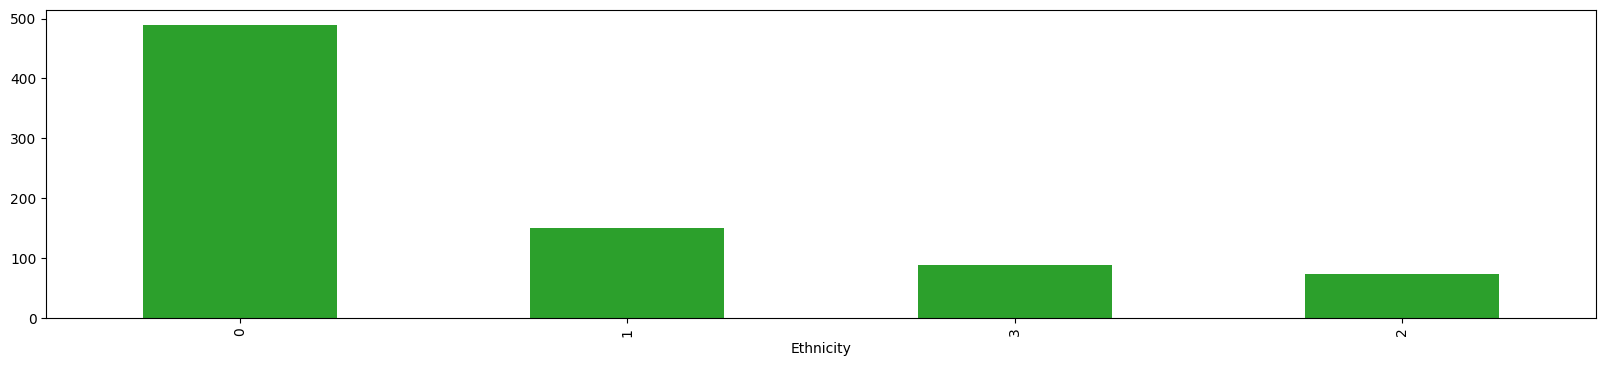

Diognised Parkinson disease


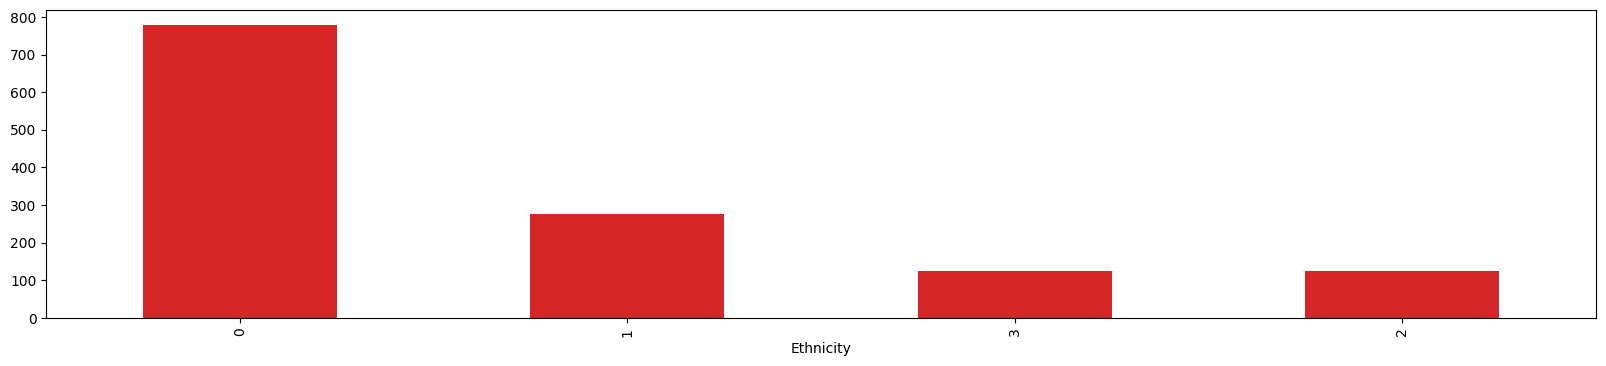







EducationLevel
No Parkinson


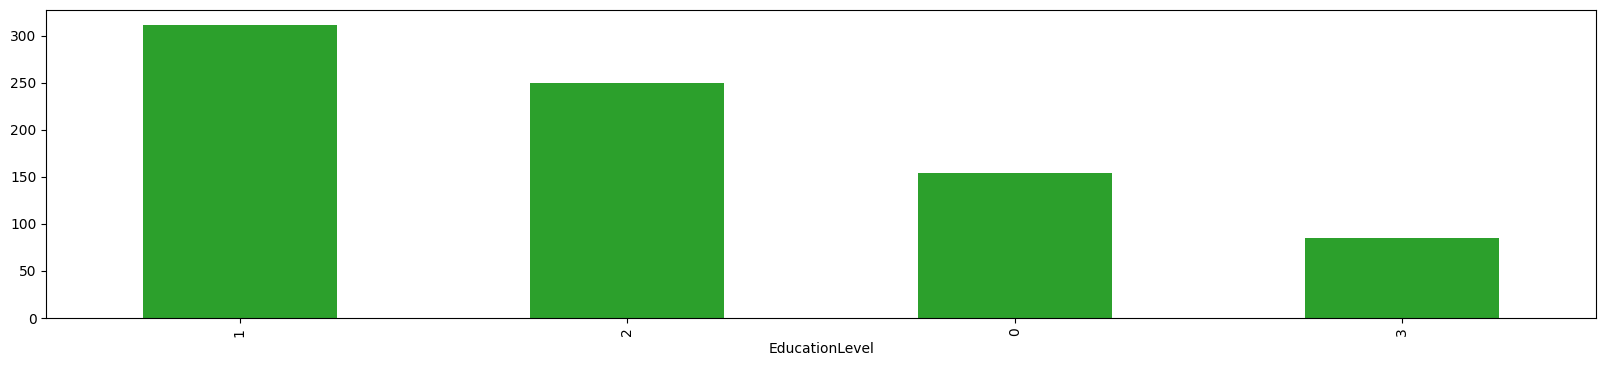

Diognised Parkinson disease


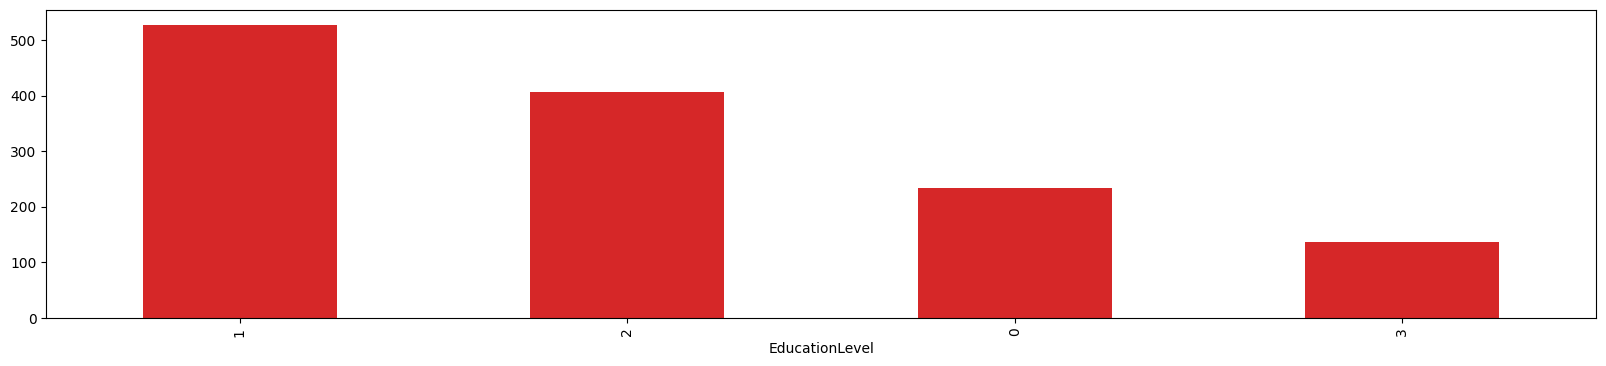







Smoking
No Parkinson


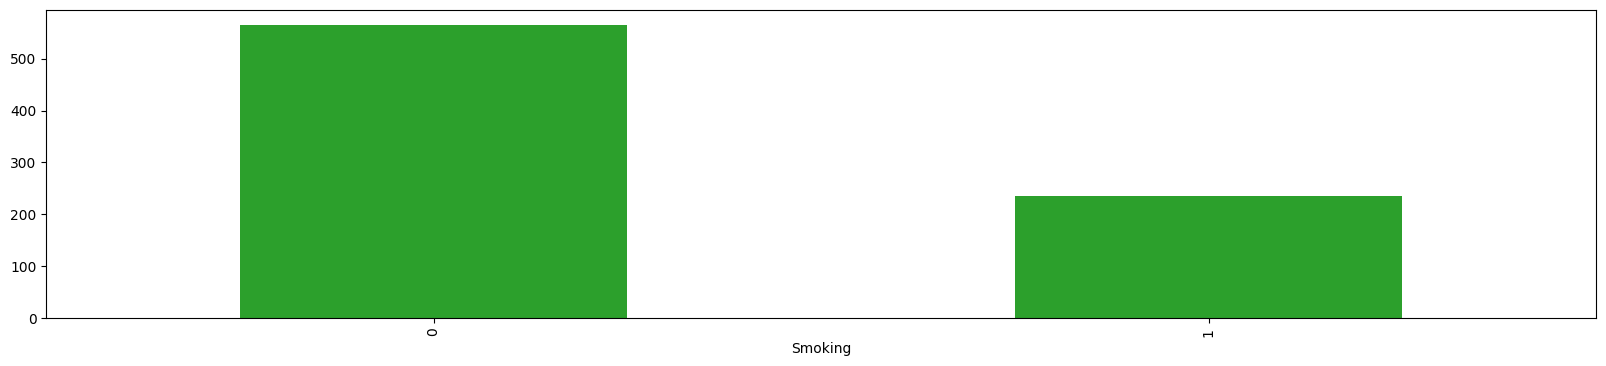

Diognised Parkinson disease


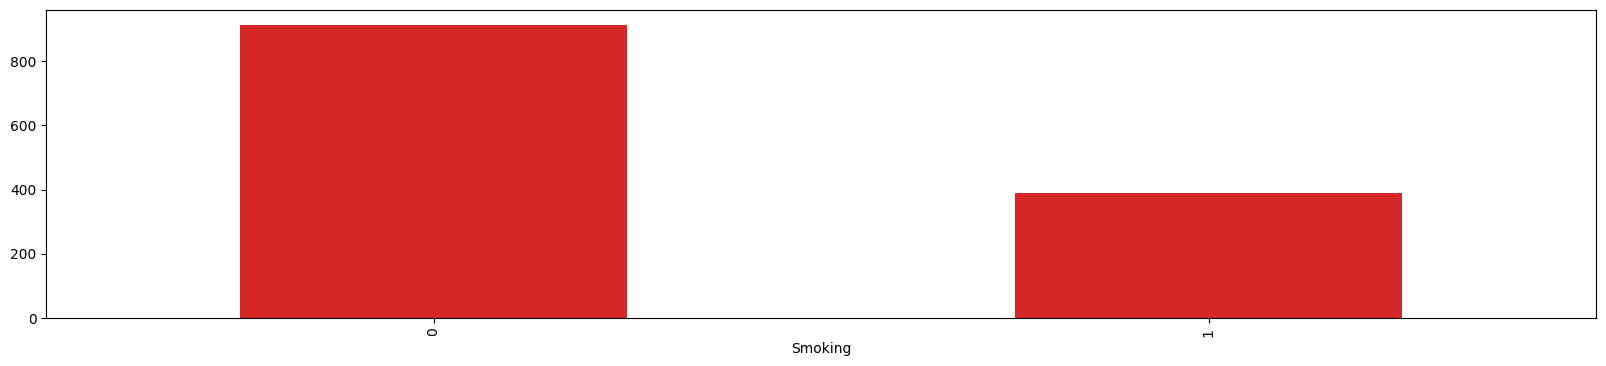







FamilyHistoryParkinsons
No Parkinson


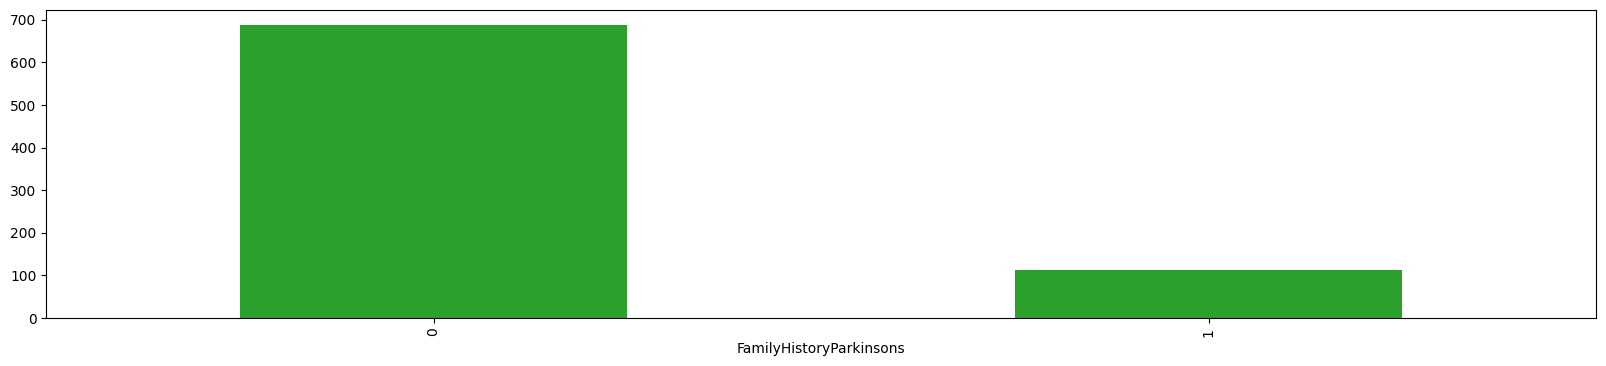

Diognised Parkinson disease


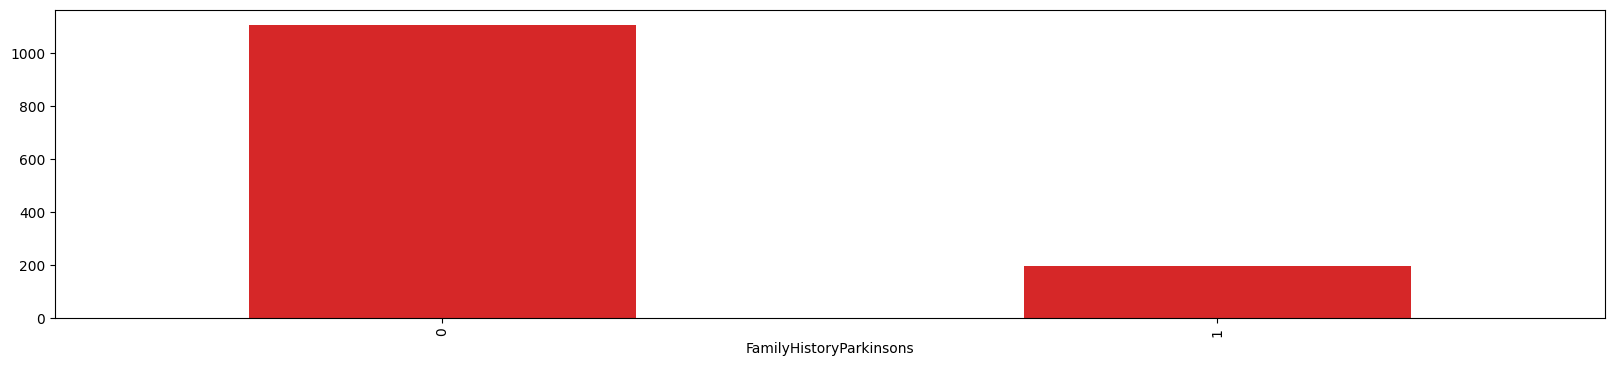







TraumaticBrainInjury
No Parkinson


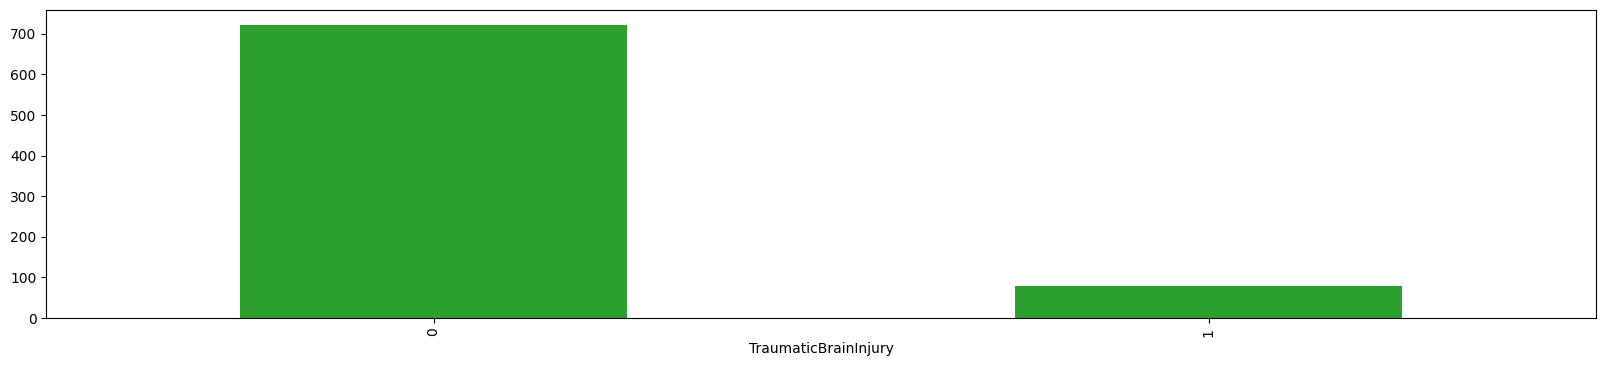

Diognised Parkinson disease


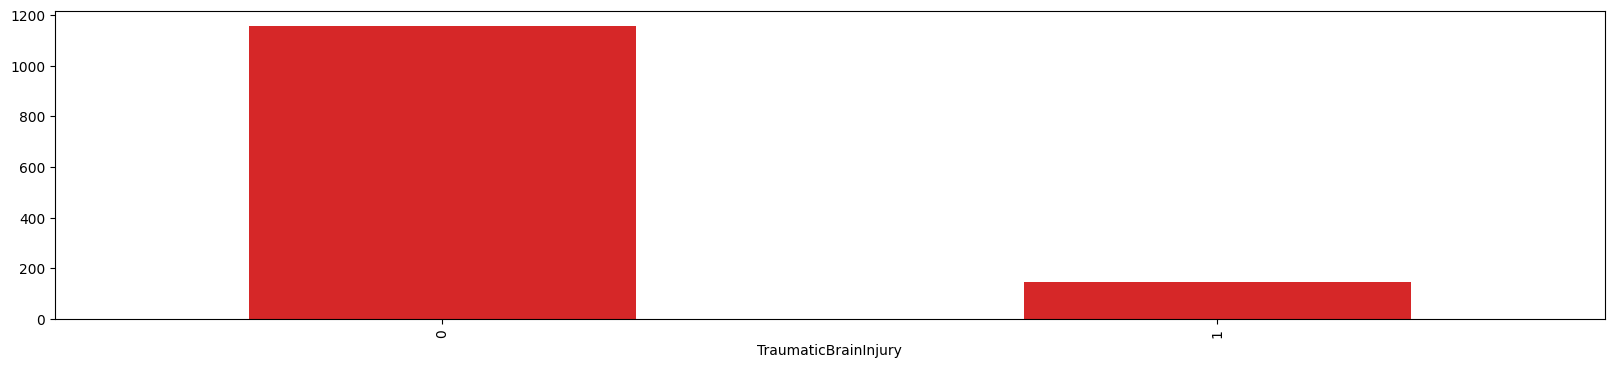







Hypertension
No Parkinson


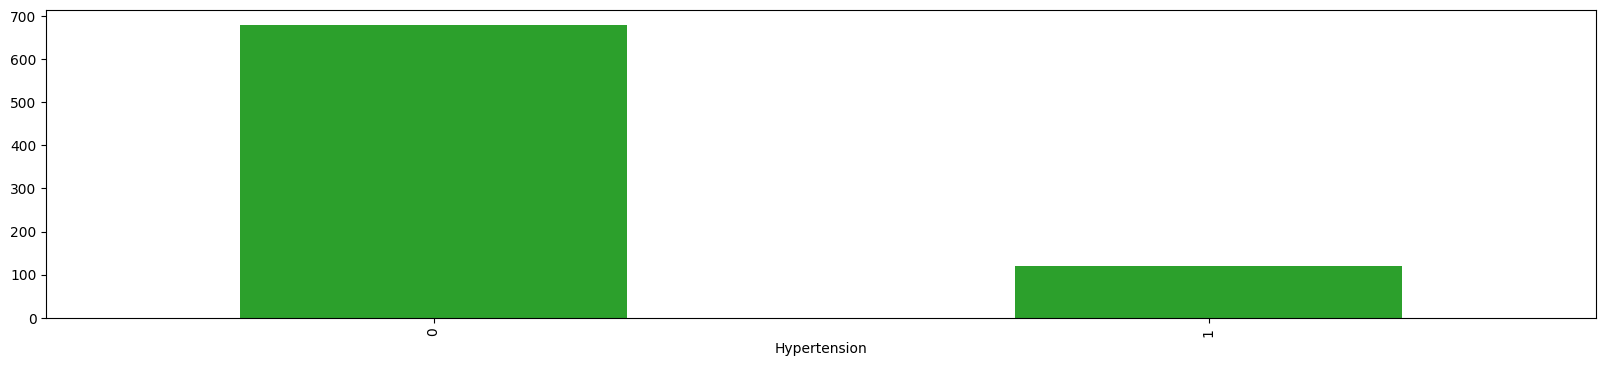

Diognised Parkinson disease


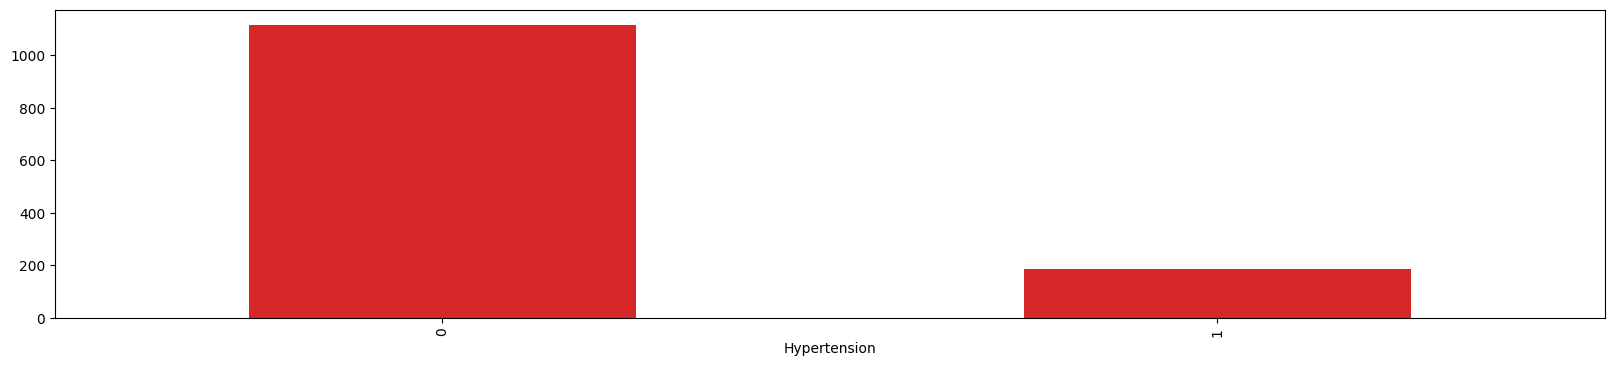







Diabetes
No Parkinson


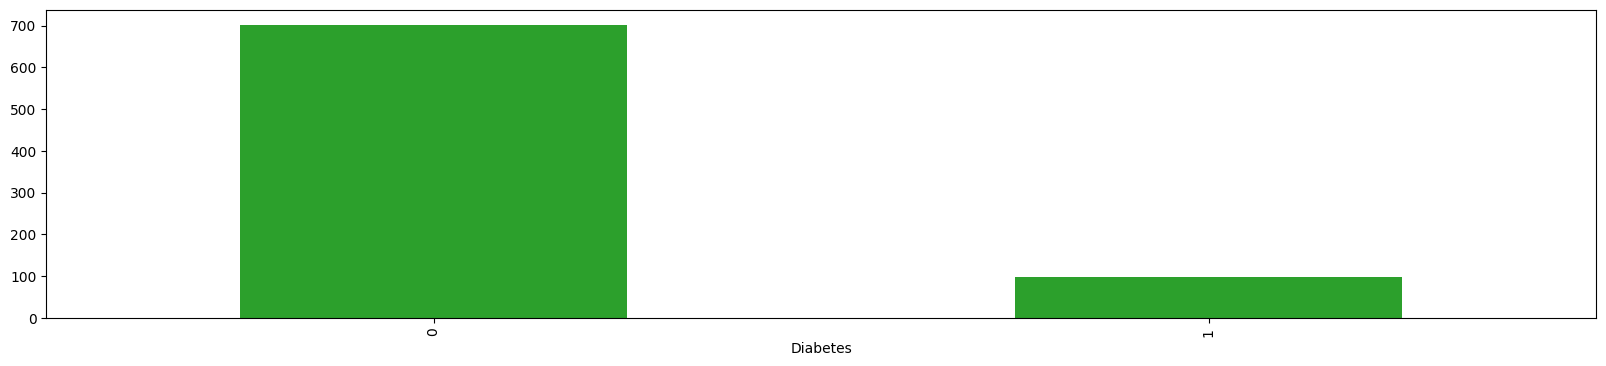

Diognised Parkinson disease


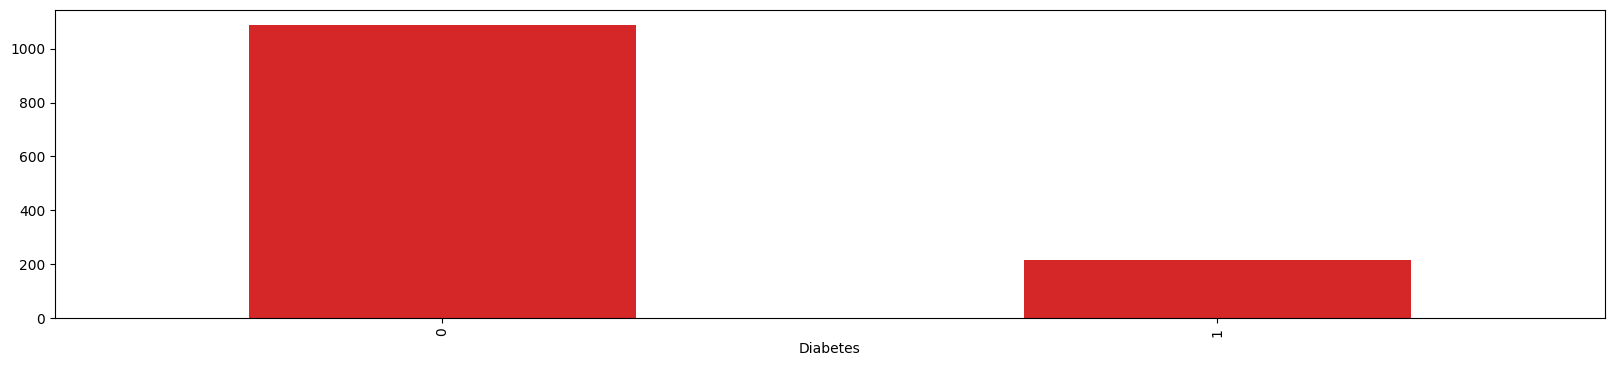







Depression
No Parkinson


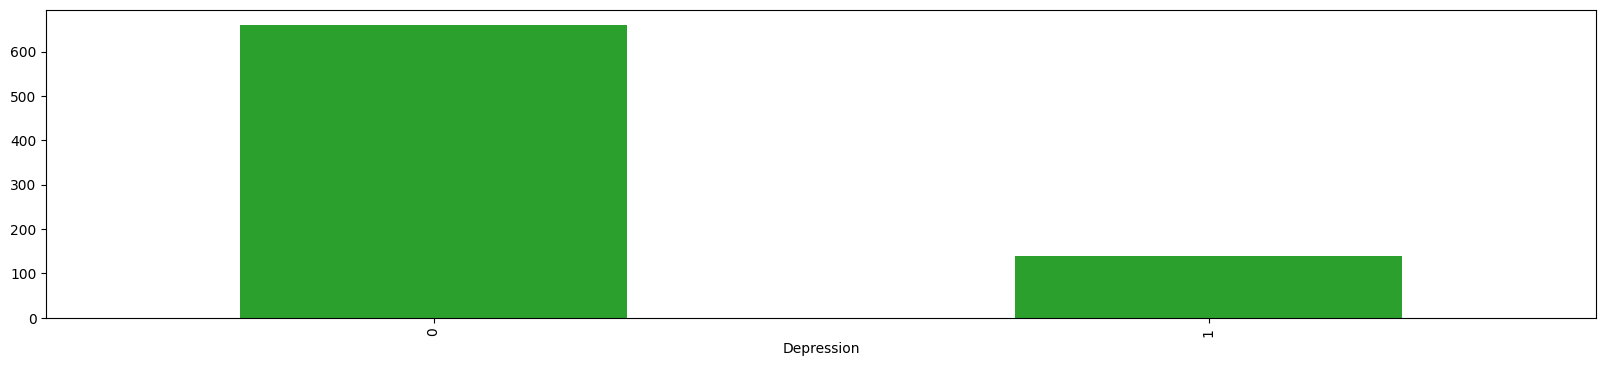

Diognised Parkinson disease


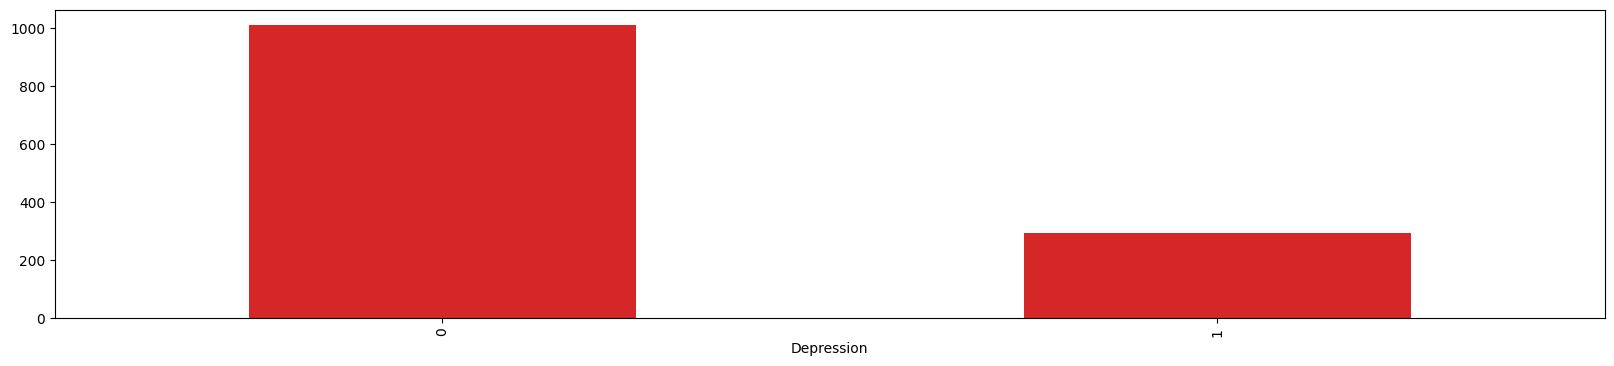







Stroke
No Parkinson


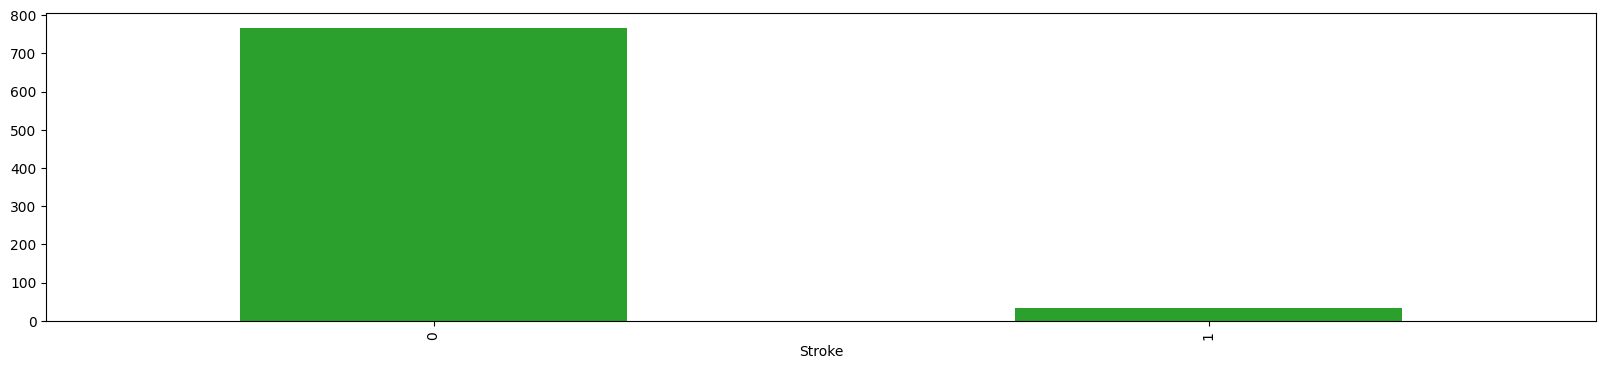

Diognised Parkinson disease


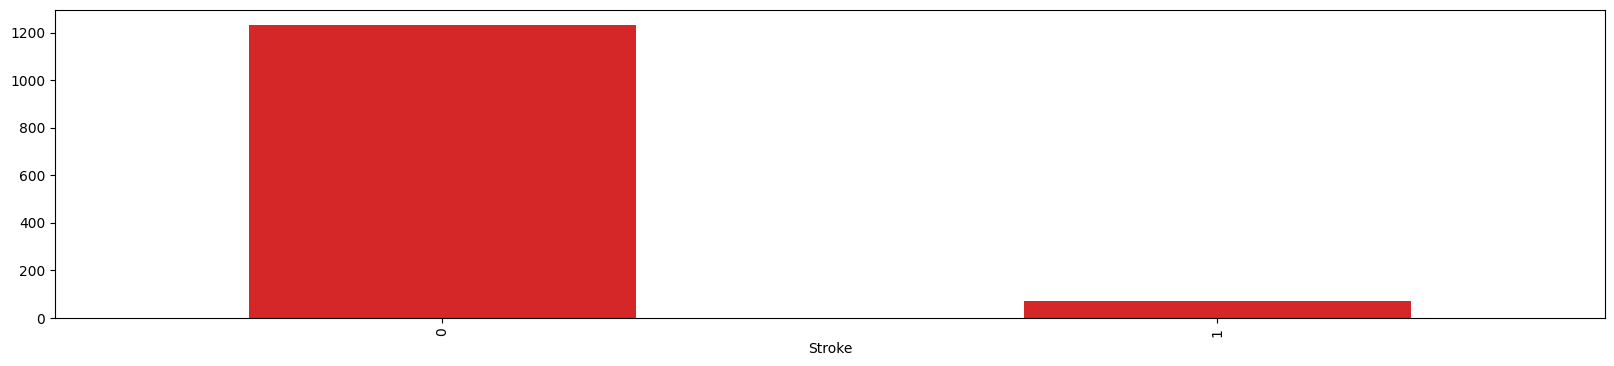







SystolicBP
No Parkinson


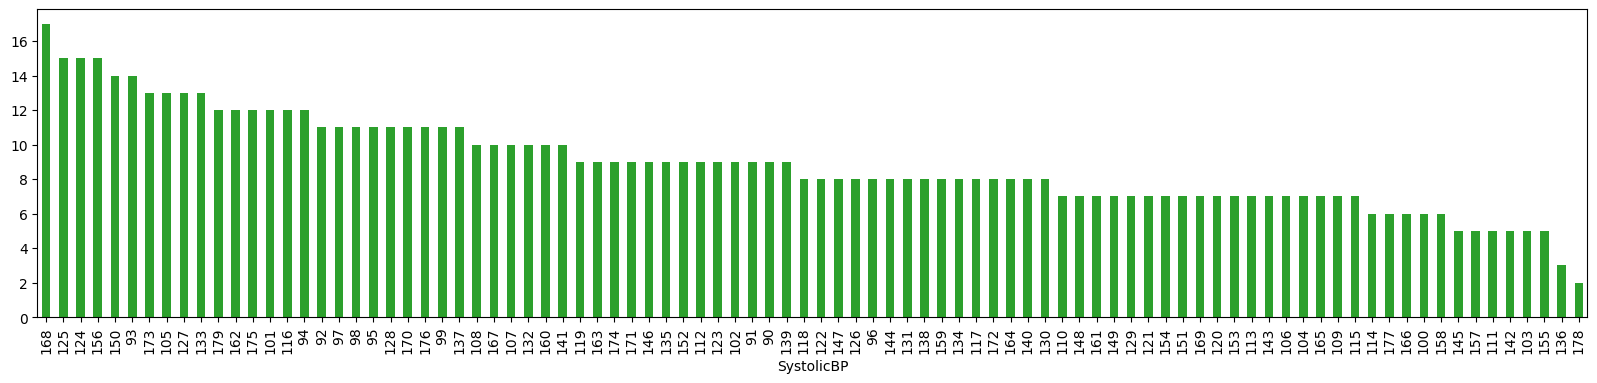

Diognised Parkinson disease


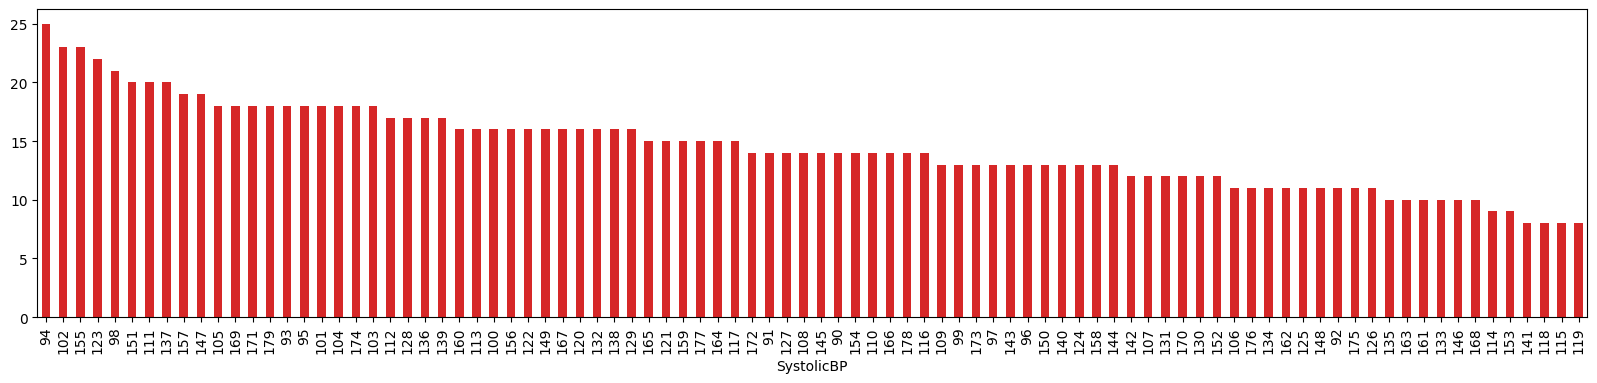







DiastolicBP
No Parkinson


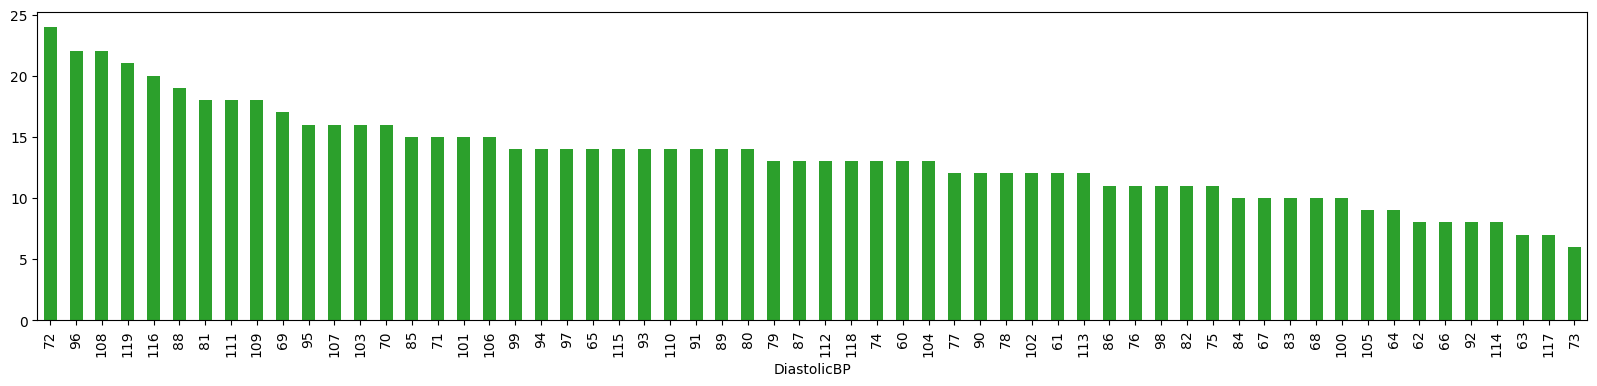

Diognised Parkinson disease


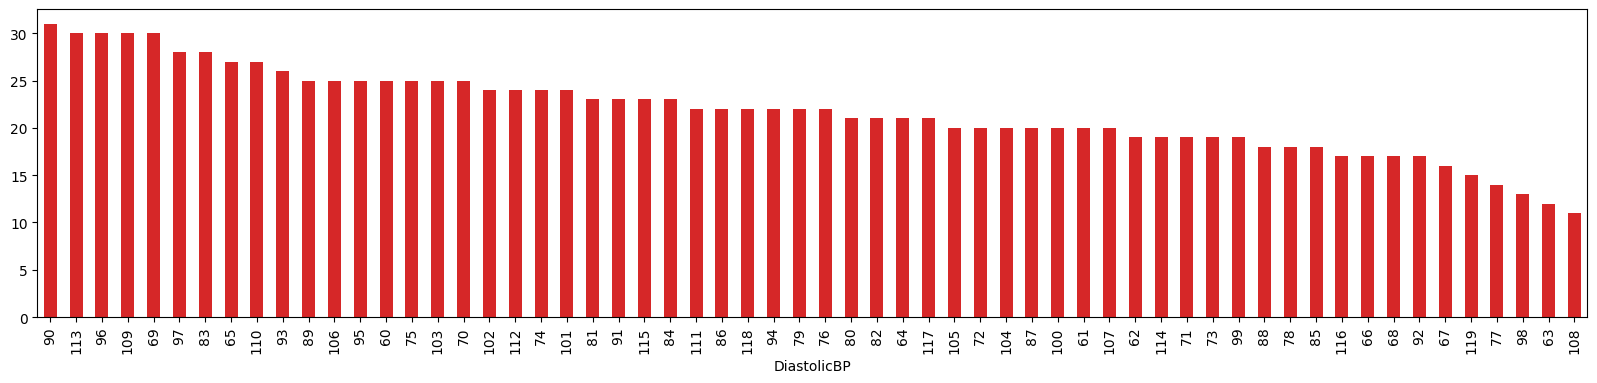







Tremor
No Parkinson


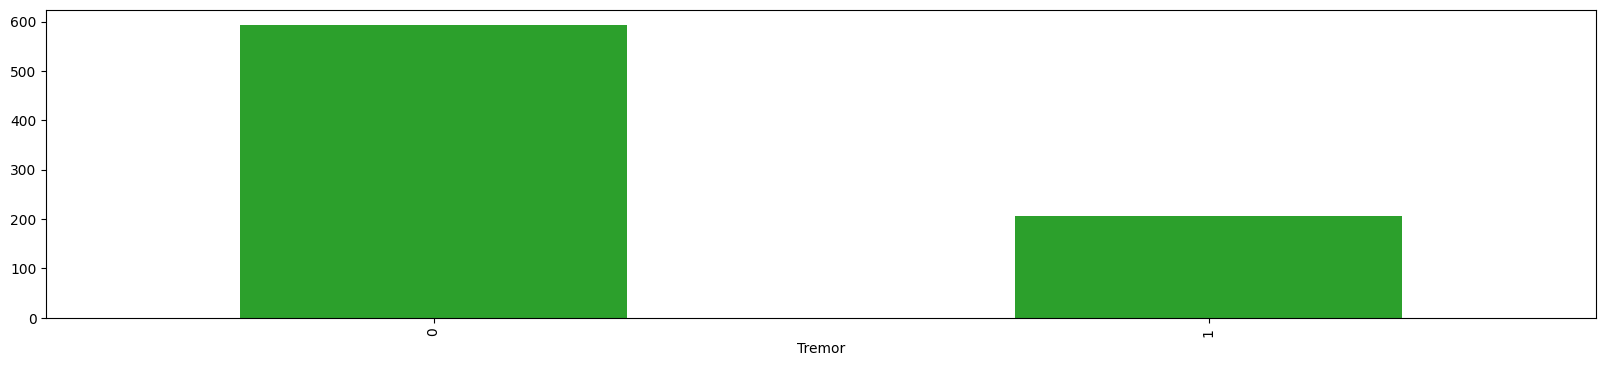

Diognised Parkinson disease


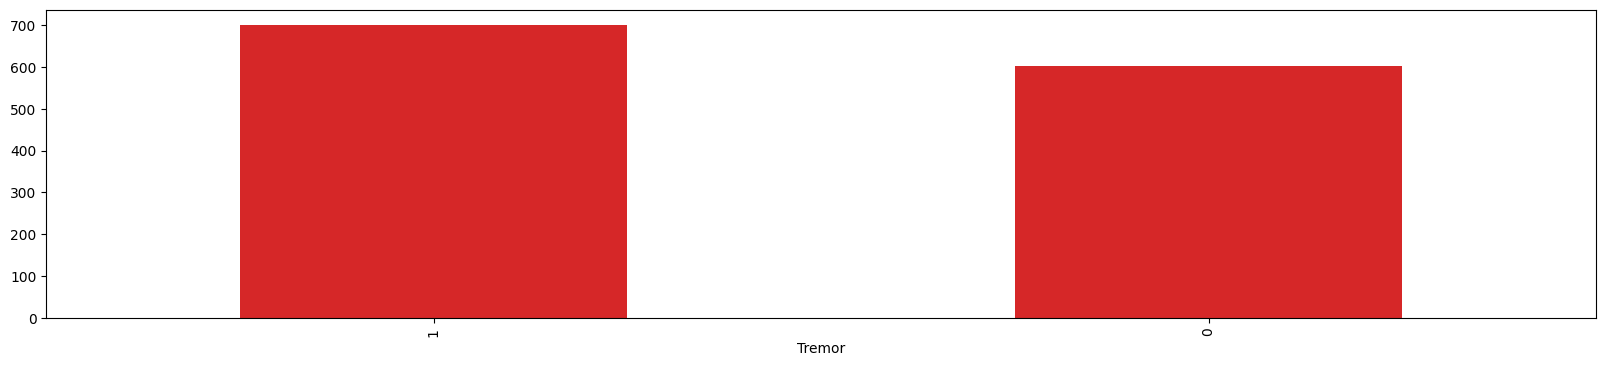







Rigidity
No Parkinson


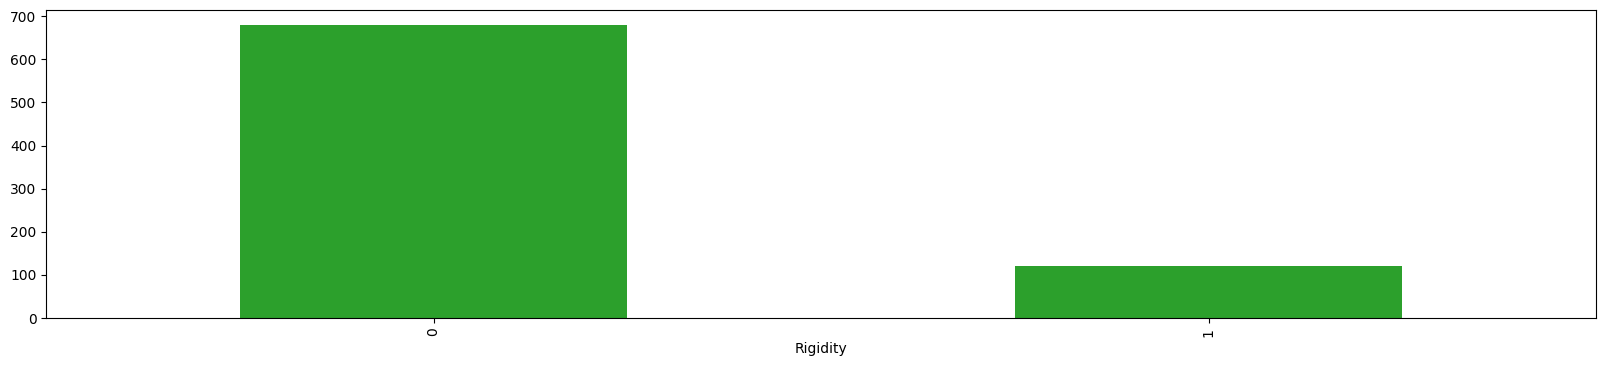

Diognised Parkinson disease


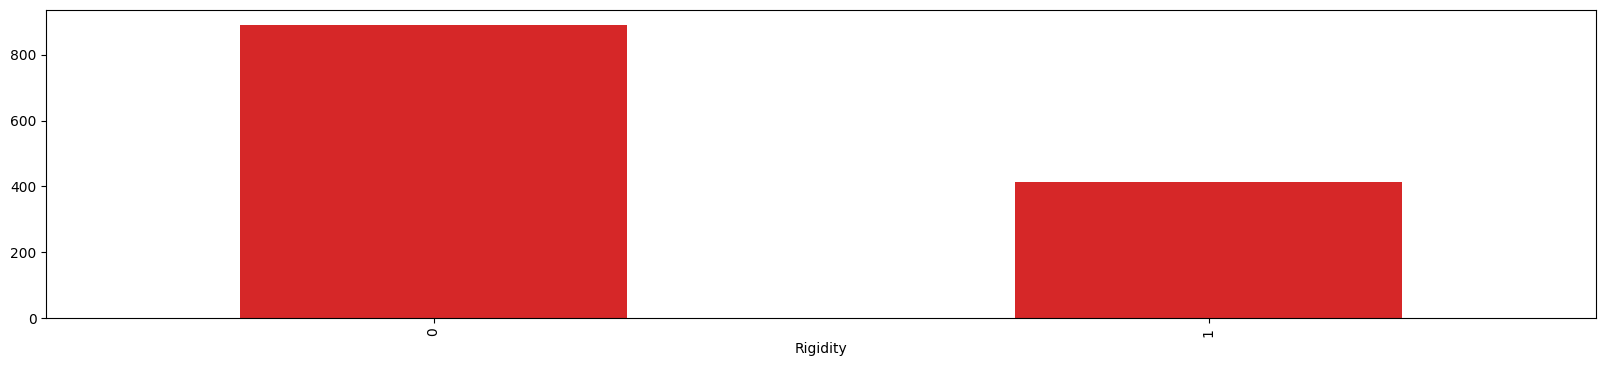







Bradykinesia
No Parkinson


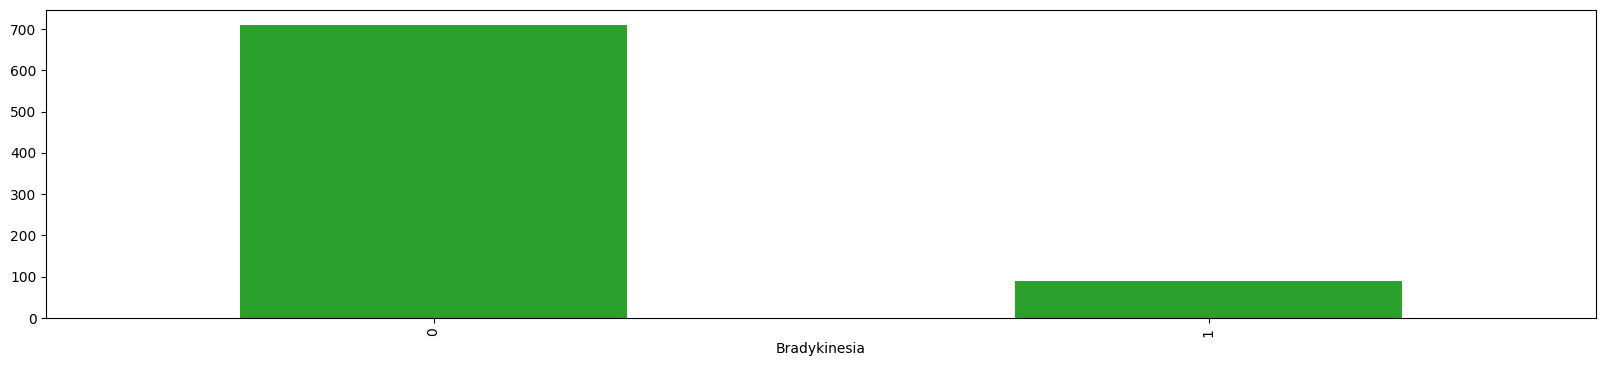

Diognised Parkinson disease


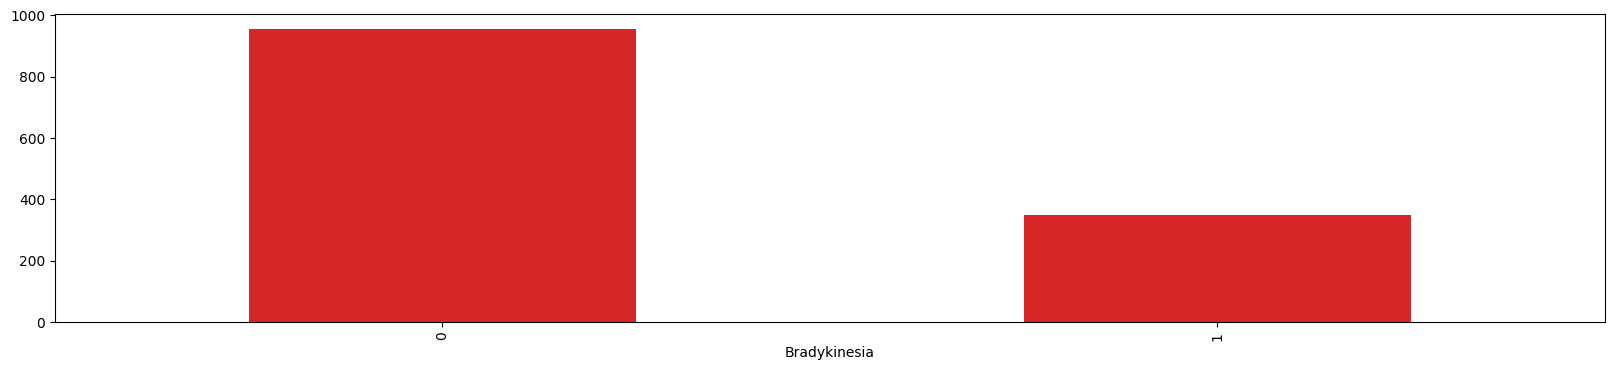







PosturalInstability
No Parkinson


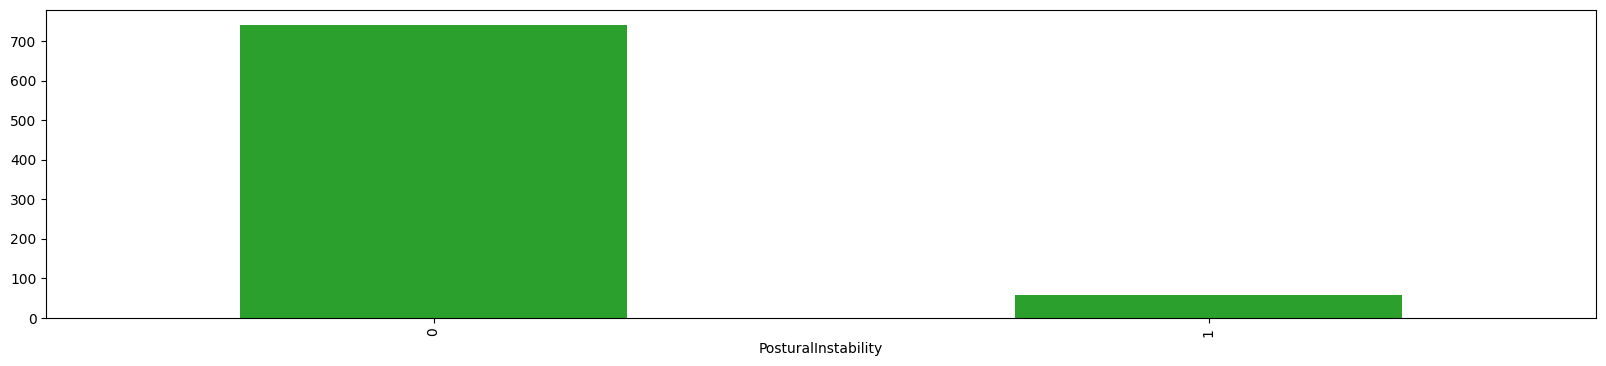

Diognised Parkinson disease


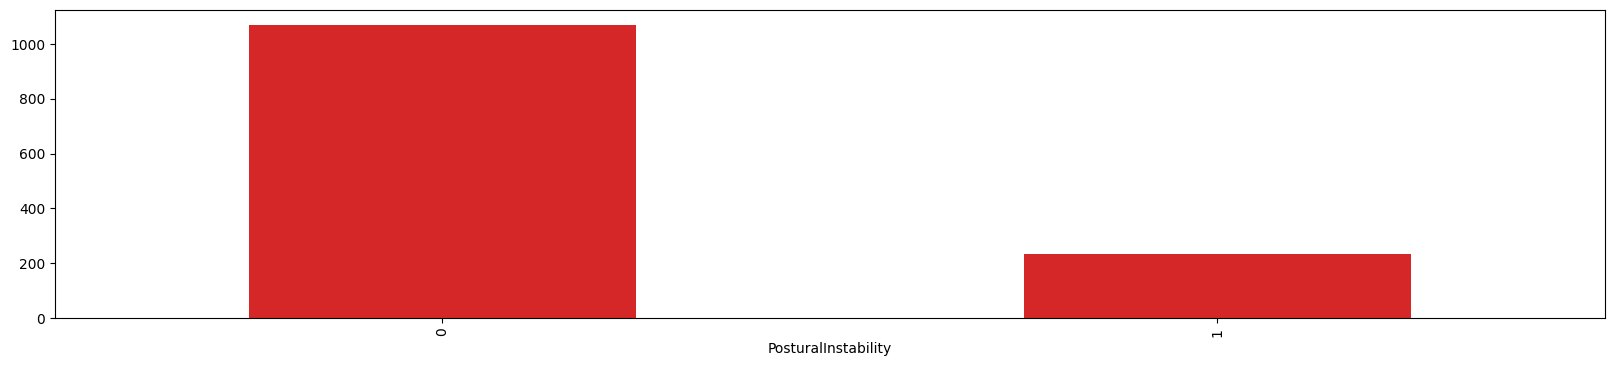







SpeechProblems
No Parkinson


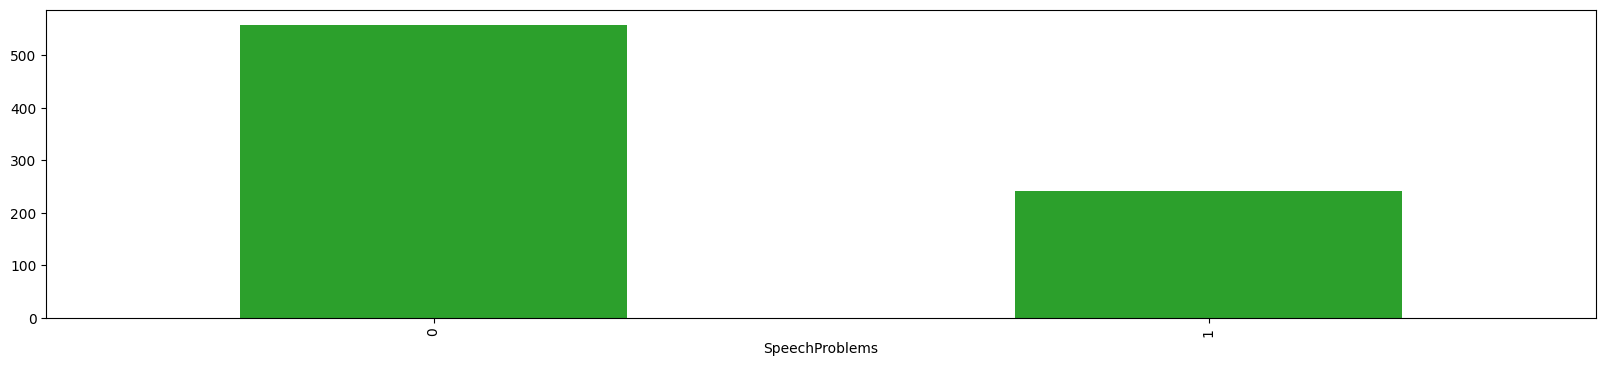

Diognised Parkinson disease


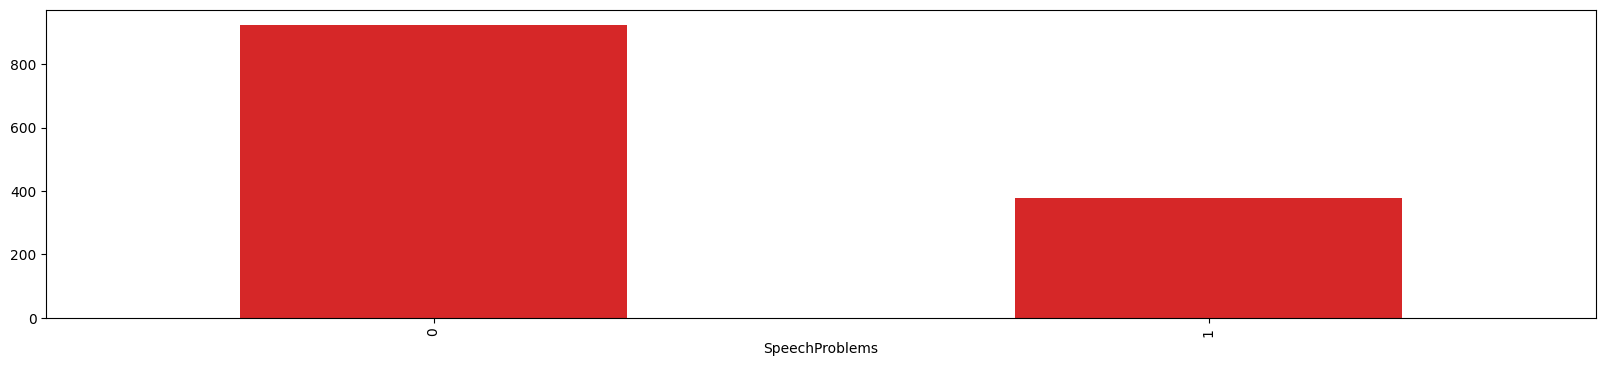







SleepDisorders
No Parkinson


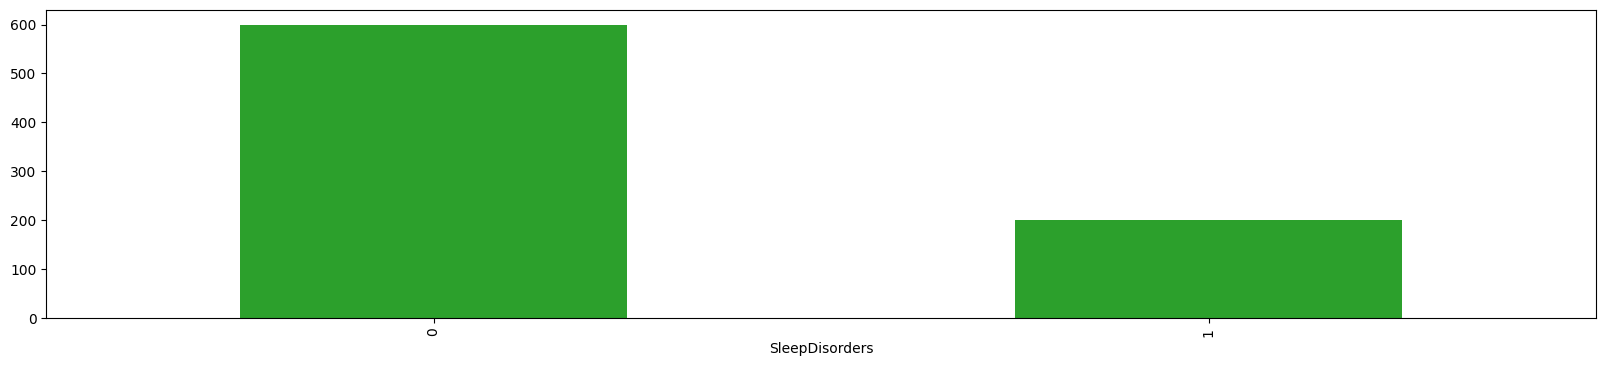

Diognised Parkinson disease


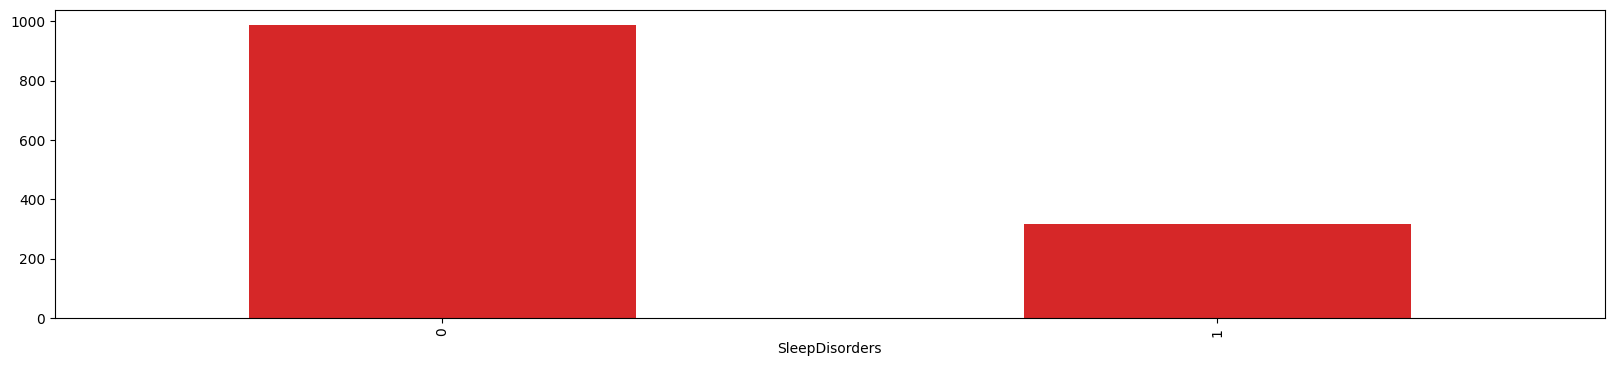







Constipation
No Parkinson


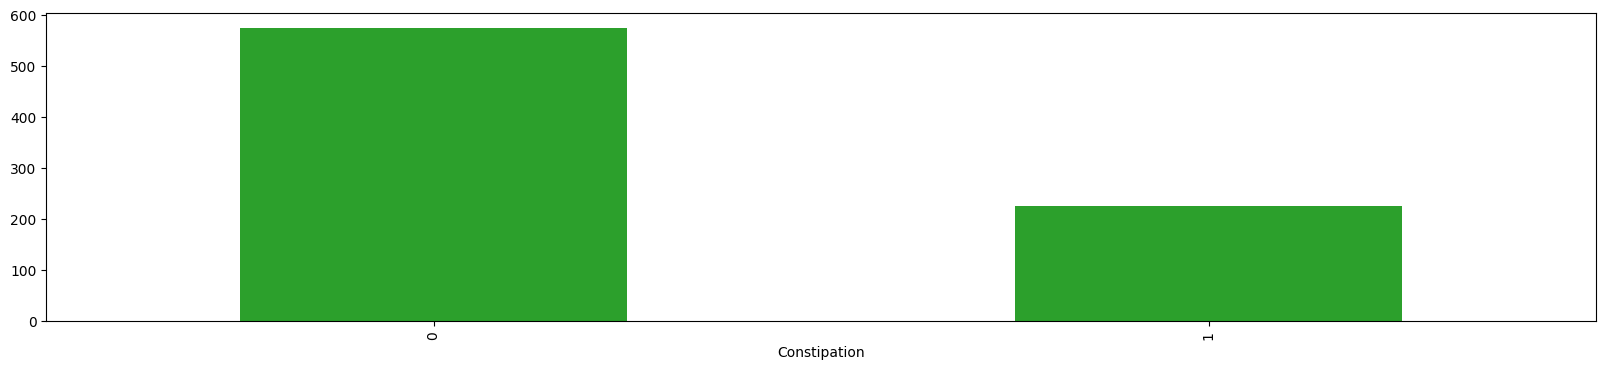

Diognised Parkinson disease


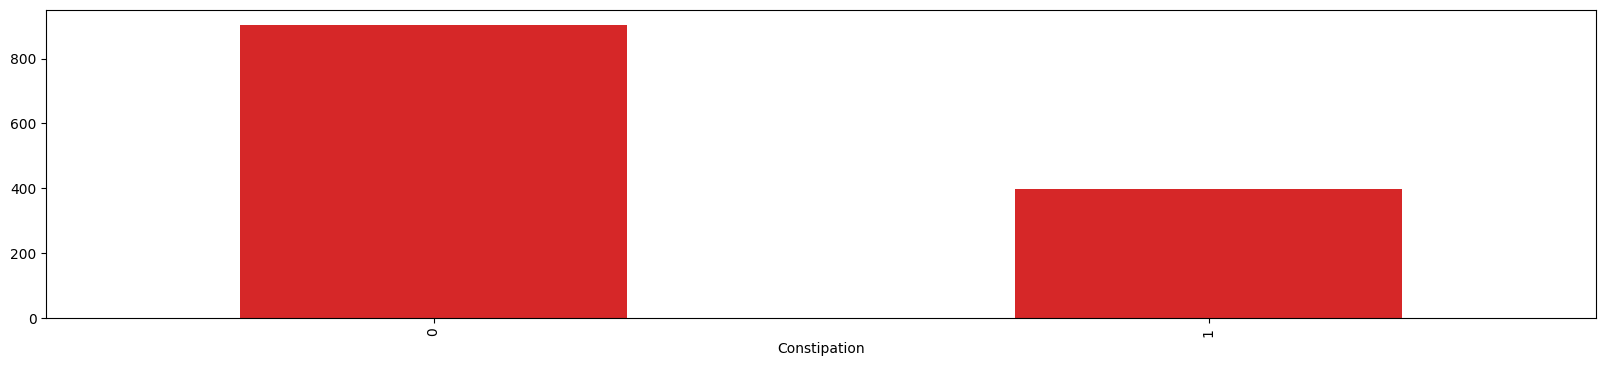







Diagnosis
No Parkinson


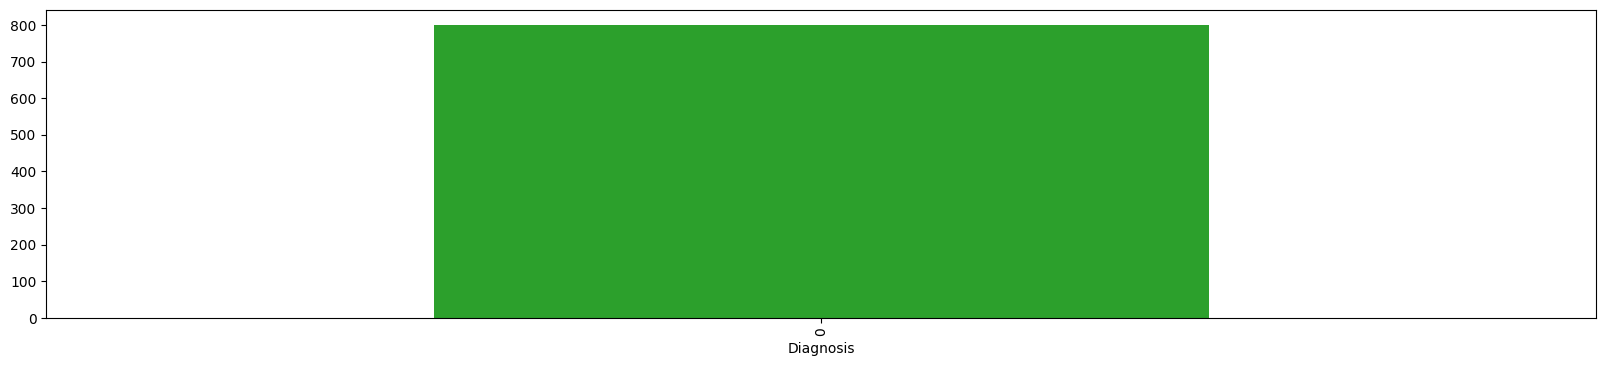

Diognised Parkinson disease


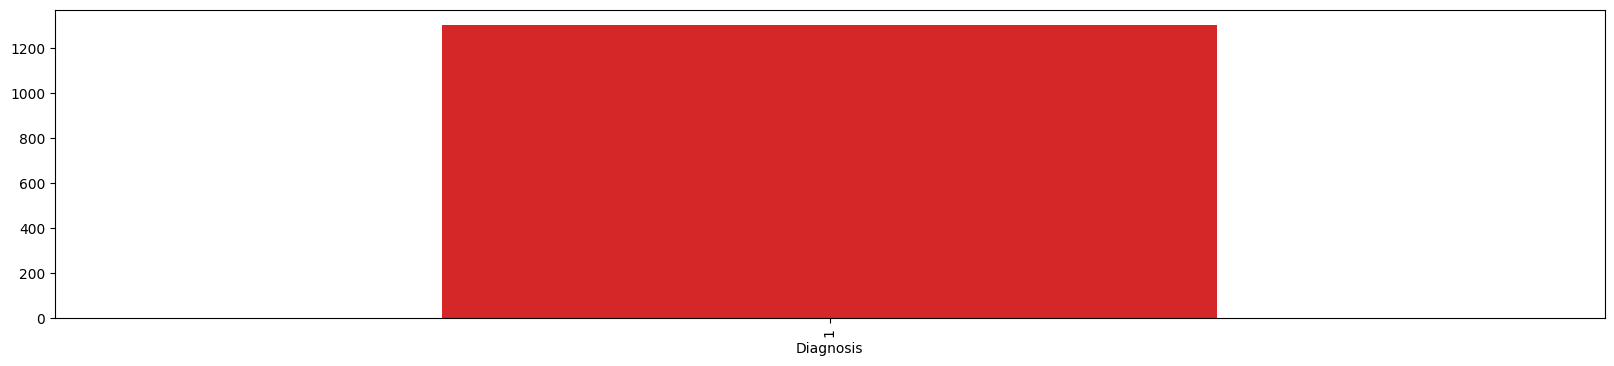

In [8]:
io = df_parkinson.select_dtypes('int').columns.drop('PatientID')

for i in io:
  print(i)
  plt.subplots(figsize=[20, 4])
  print('No Parkinson')
  res1 = df_parkinson[f'{i}'][df_parkinson['Diagnosis'] == 0].value_counts()
  res1.plot.bar(res1.values, color='tab:green')
  plt.show()
  print('Diognised Parkinson disease')
  plt.subplots(figsize=[20, 4])
  res2 = df_parkinson[f'{i}'][df_parkinson['Diagnosis'] == 1].value_counts()
  res2.plot.bar(res2.values, color='tab:red')
  plt.show()
  print('\n'*5)

# comparison (difference between no parkinson and parkinson diagnosis indicates difference between this two gruops)

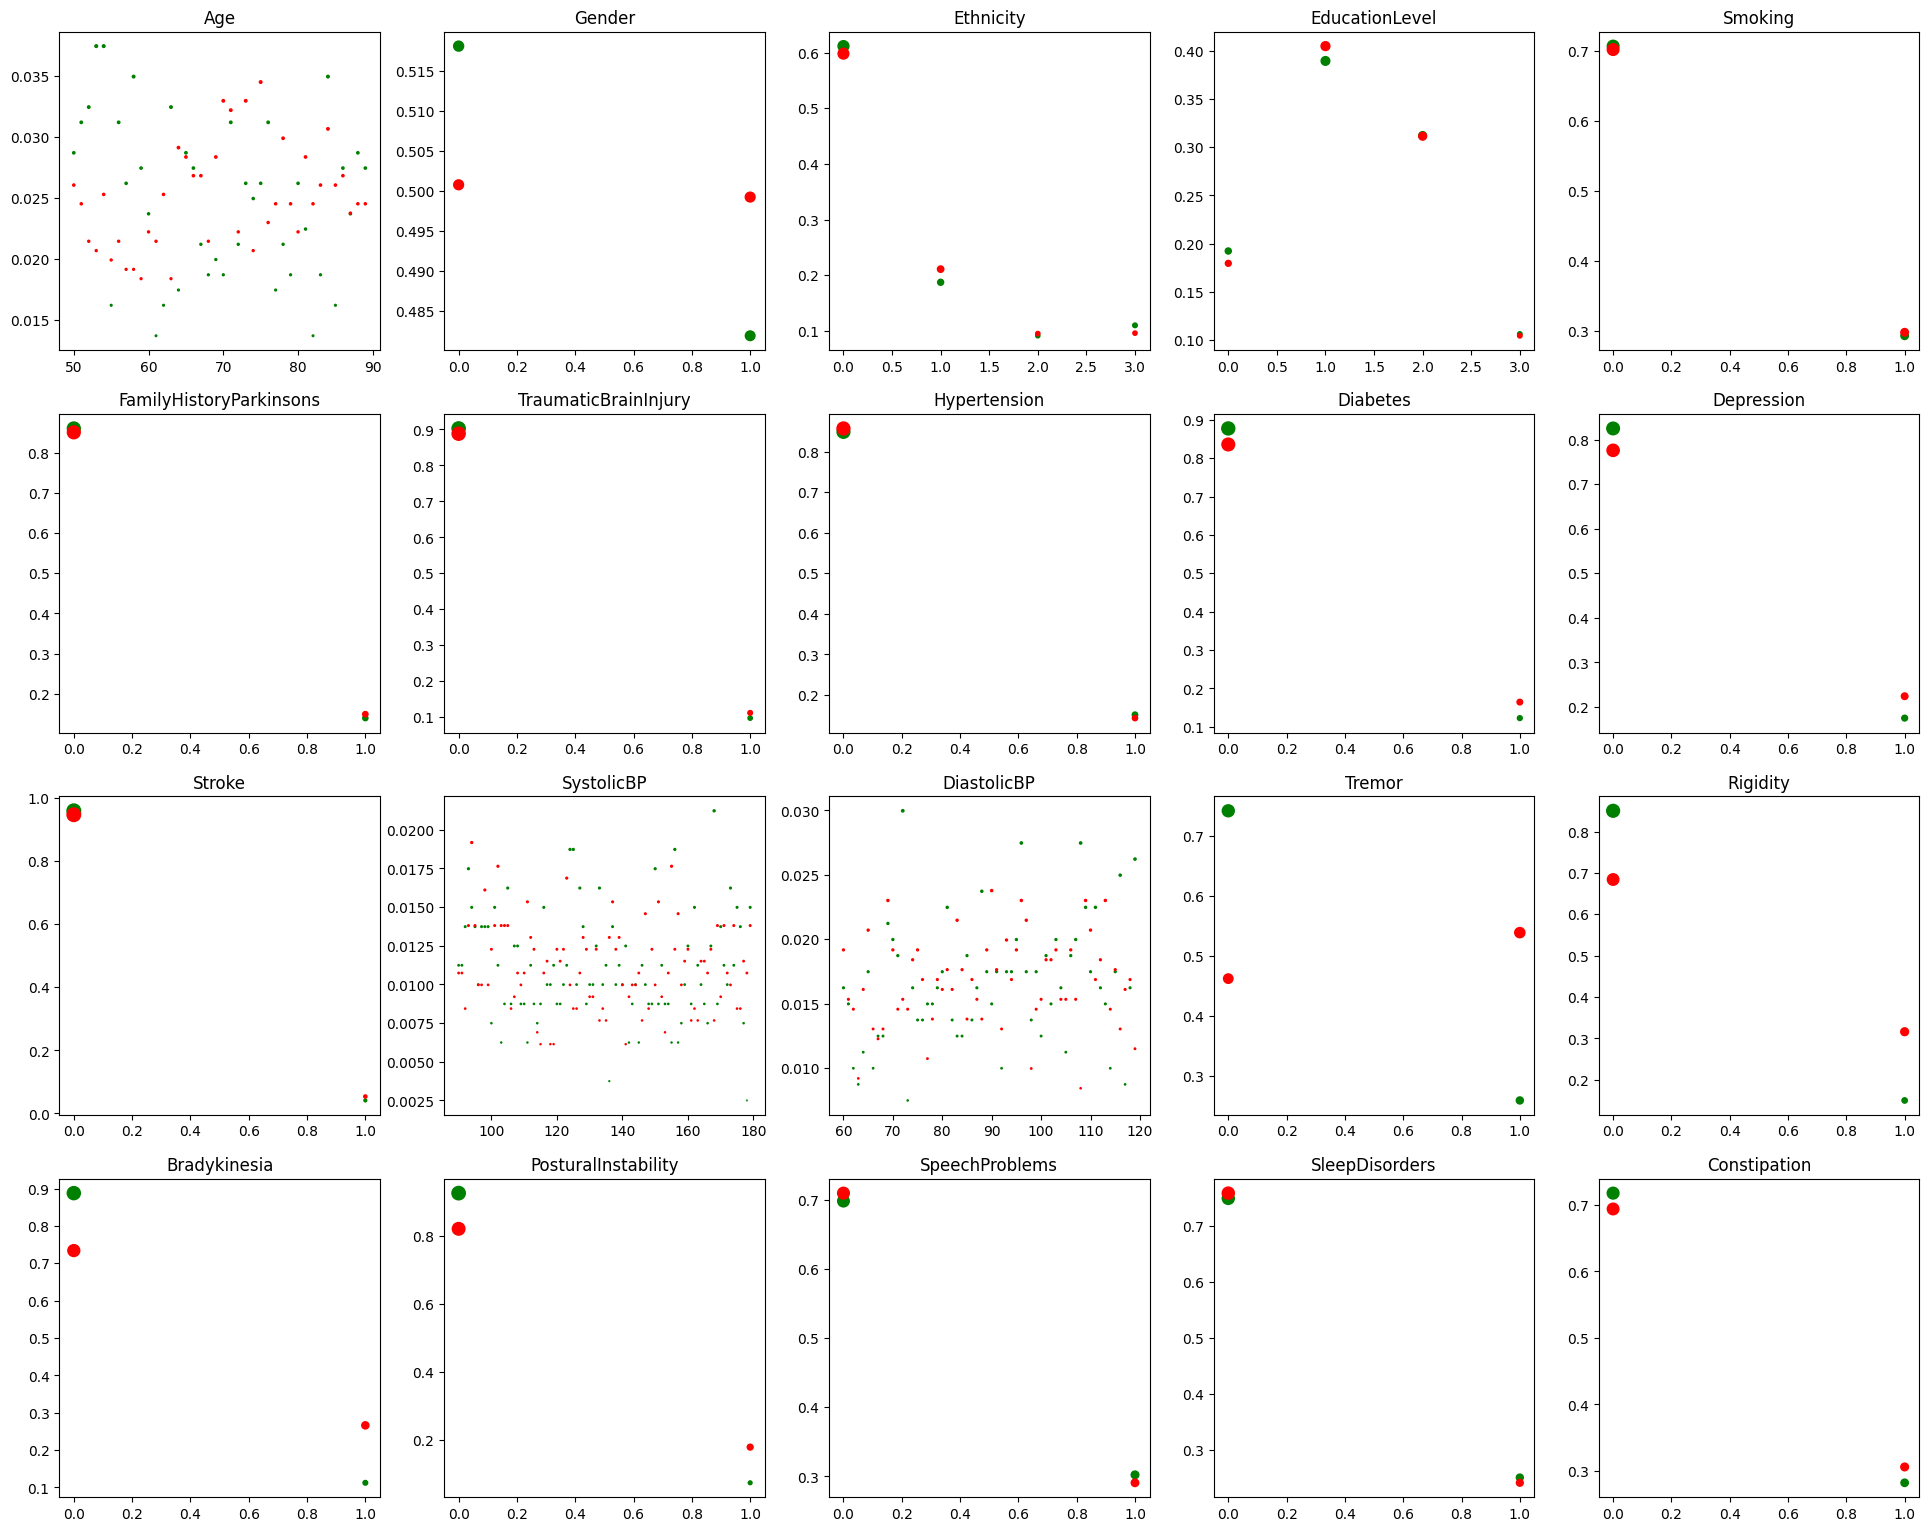

In [9]:
plt.figure(figsize=(24,24))
for x, i in enumerate(io):
  if i == 'Diagnosis':
    continue
  res1 = df_parkinson[f'{i}'][df_parkinson['Diagnosis'] == 0].value_counts() / len(df_parkinson[f'{i}'][df_parkinson['Diagnosis'] == 0])
  res2 = df_parkinson[f'{i}'][df_parkinson['Diagnosis'] == 1].value_counts() / len(df_parkinson[f'{i}'][df_parkinson['Diagnosis'] == 1])
  plt.subplot(5, 5, x+1)
  plt.scatter(res1.index, res1.values, color='green', s=res1.values*100)
  plt.scatter(res2.index, res2.values, color='red', s=res2.values*100)
  plt.title(i)
  plt.xlabel('')

plt.show()


# float values analysis

In [10]:
for i in df_parkinson.select_dtypes('float'):
  print(i)

BMI
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
UPDRS
MoCA
FunctionalAssessment


In [11]:
df_parkinson.select_dtypes('float').describe()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,27.209493,10.040413,5.016674,4.912901,6.996639,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694
std,7.208099,5.687014,2.890919,2.872115,1.753065,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877
min,15.008333,0.002228,0.004157,0.000011,4.000497,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505
25%,20.782176,5.150278,2.455703,2.478503,5.488864,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890
50%,27.184571,10.070337,5.031550,4.825187,6.929819,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227
75%,33.462452,14.829565,7.512795,7.381487,8.558719,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220
max,39.999887,19.988866,9.995255,9.995864,9.999821,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697


# histograms for data (No Parkinson and Parkinson disease)

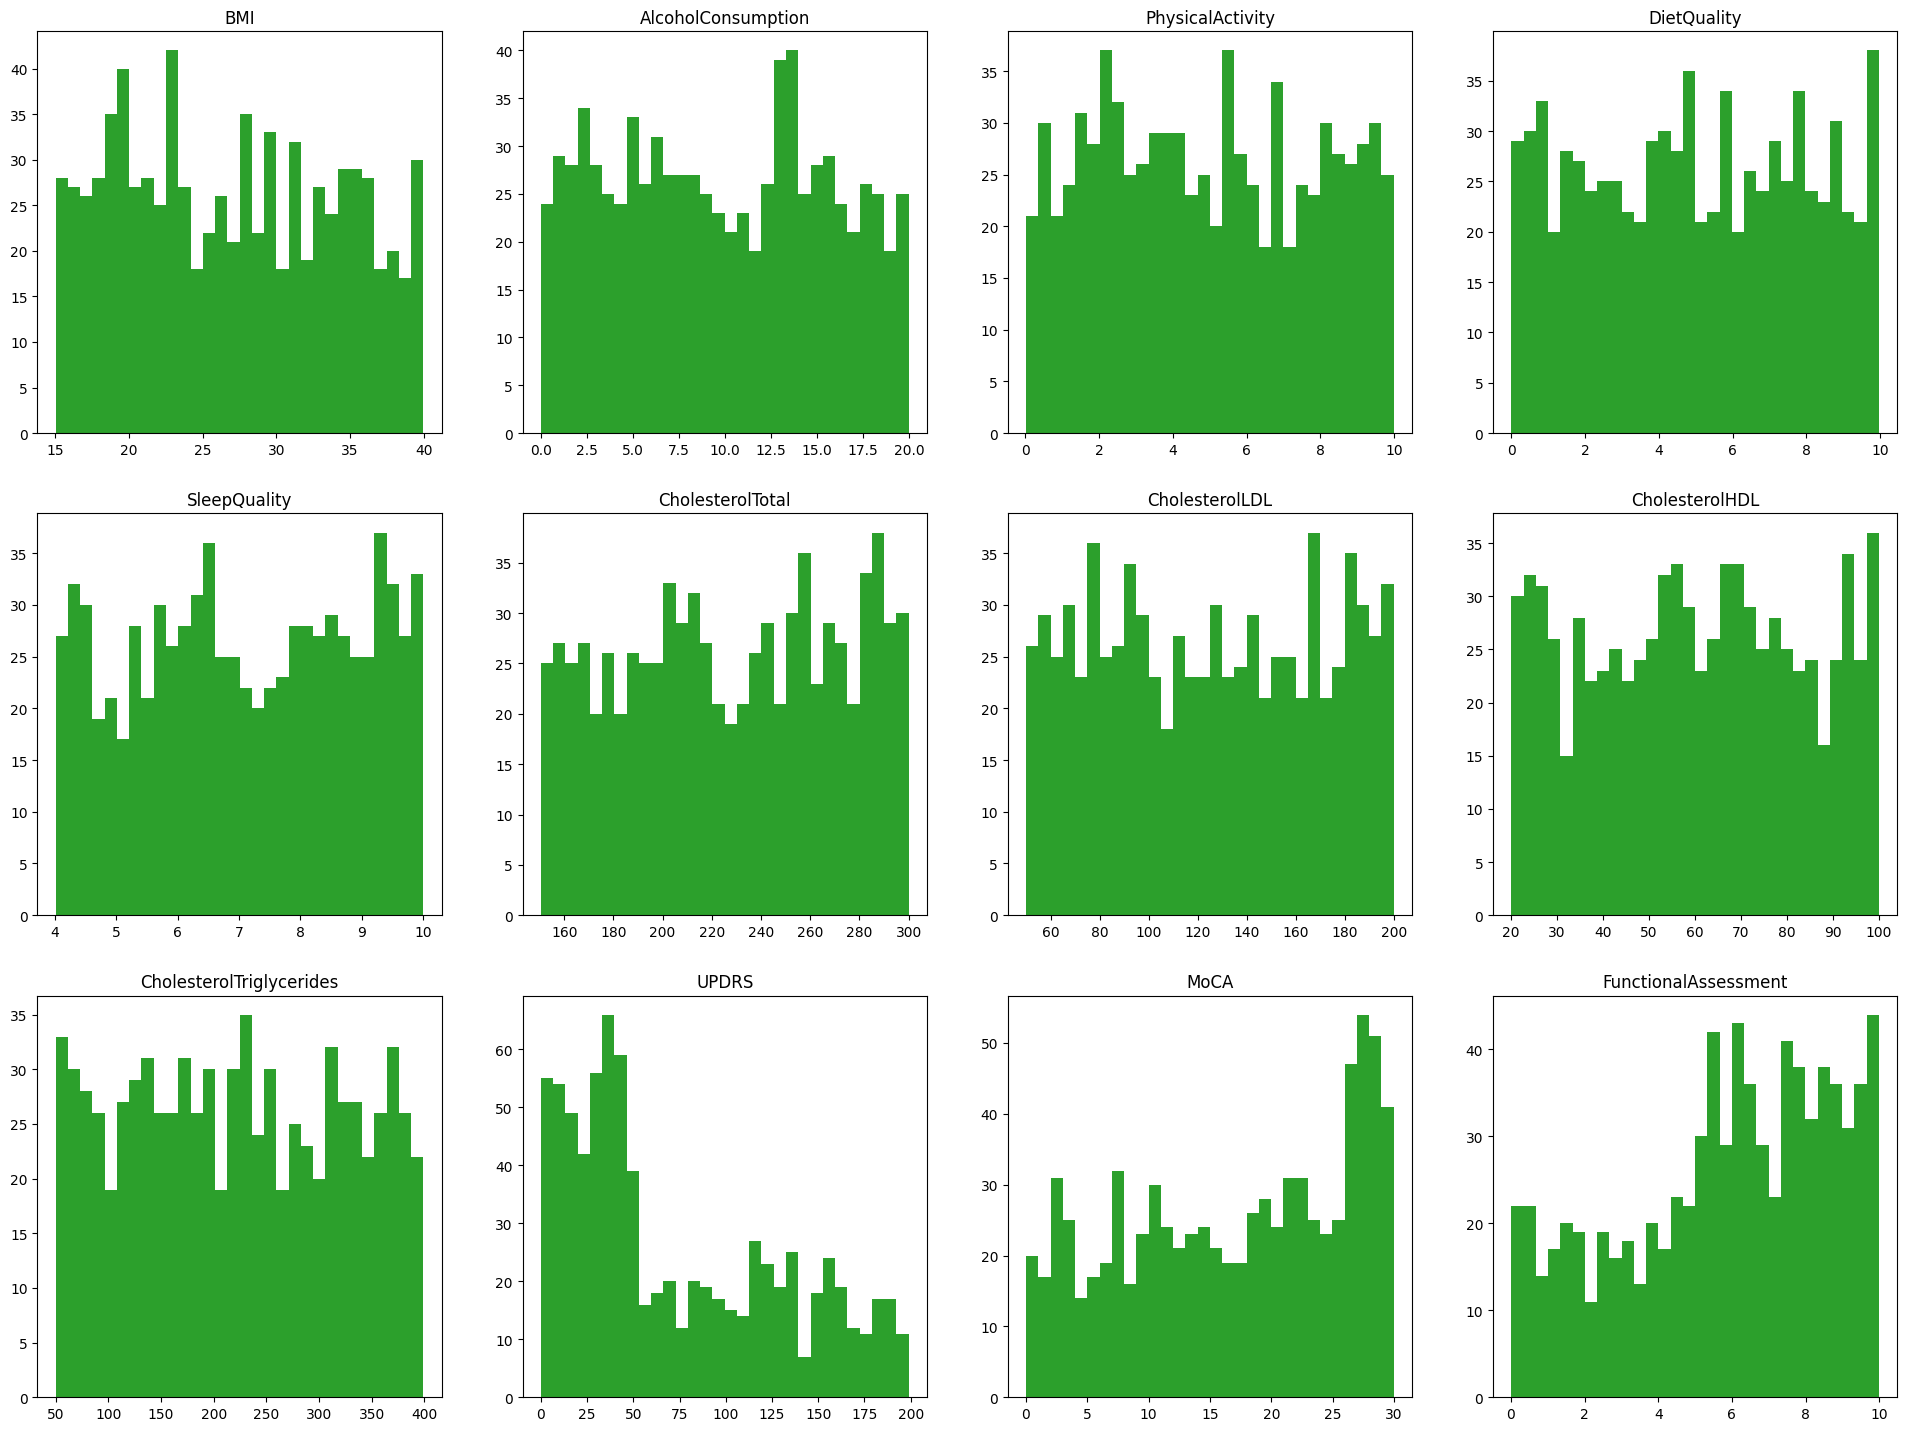

In [12]:
plt.figure(figsize=(24,24))
for x, i in enumerate(df_parkinson.select_dtypes('float')):
  plt.subplot(4, 4, x+1)
  plt.hist(df_parkinson[i][df_parkinson['Diagnosis'] == 0], color='tab:green', bins=30)
  #plt.hist(df_parkinson[i][df_parkinson['Diagnosis'] == 1], color='tab:red')
  plt.title(i)
plt.show()

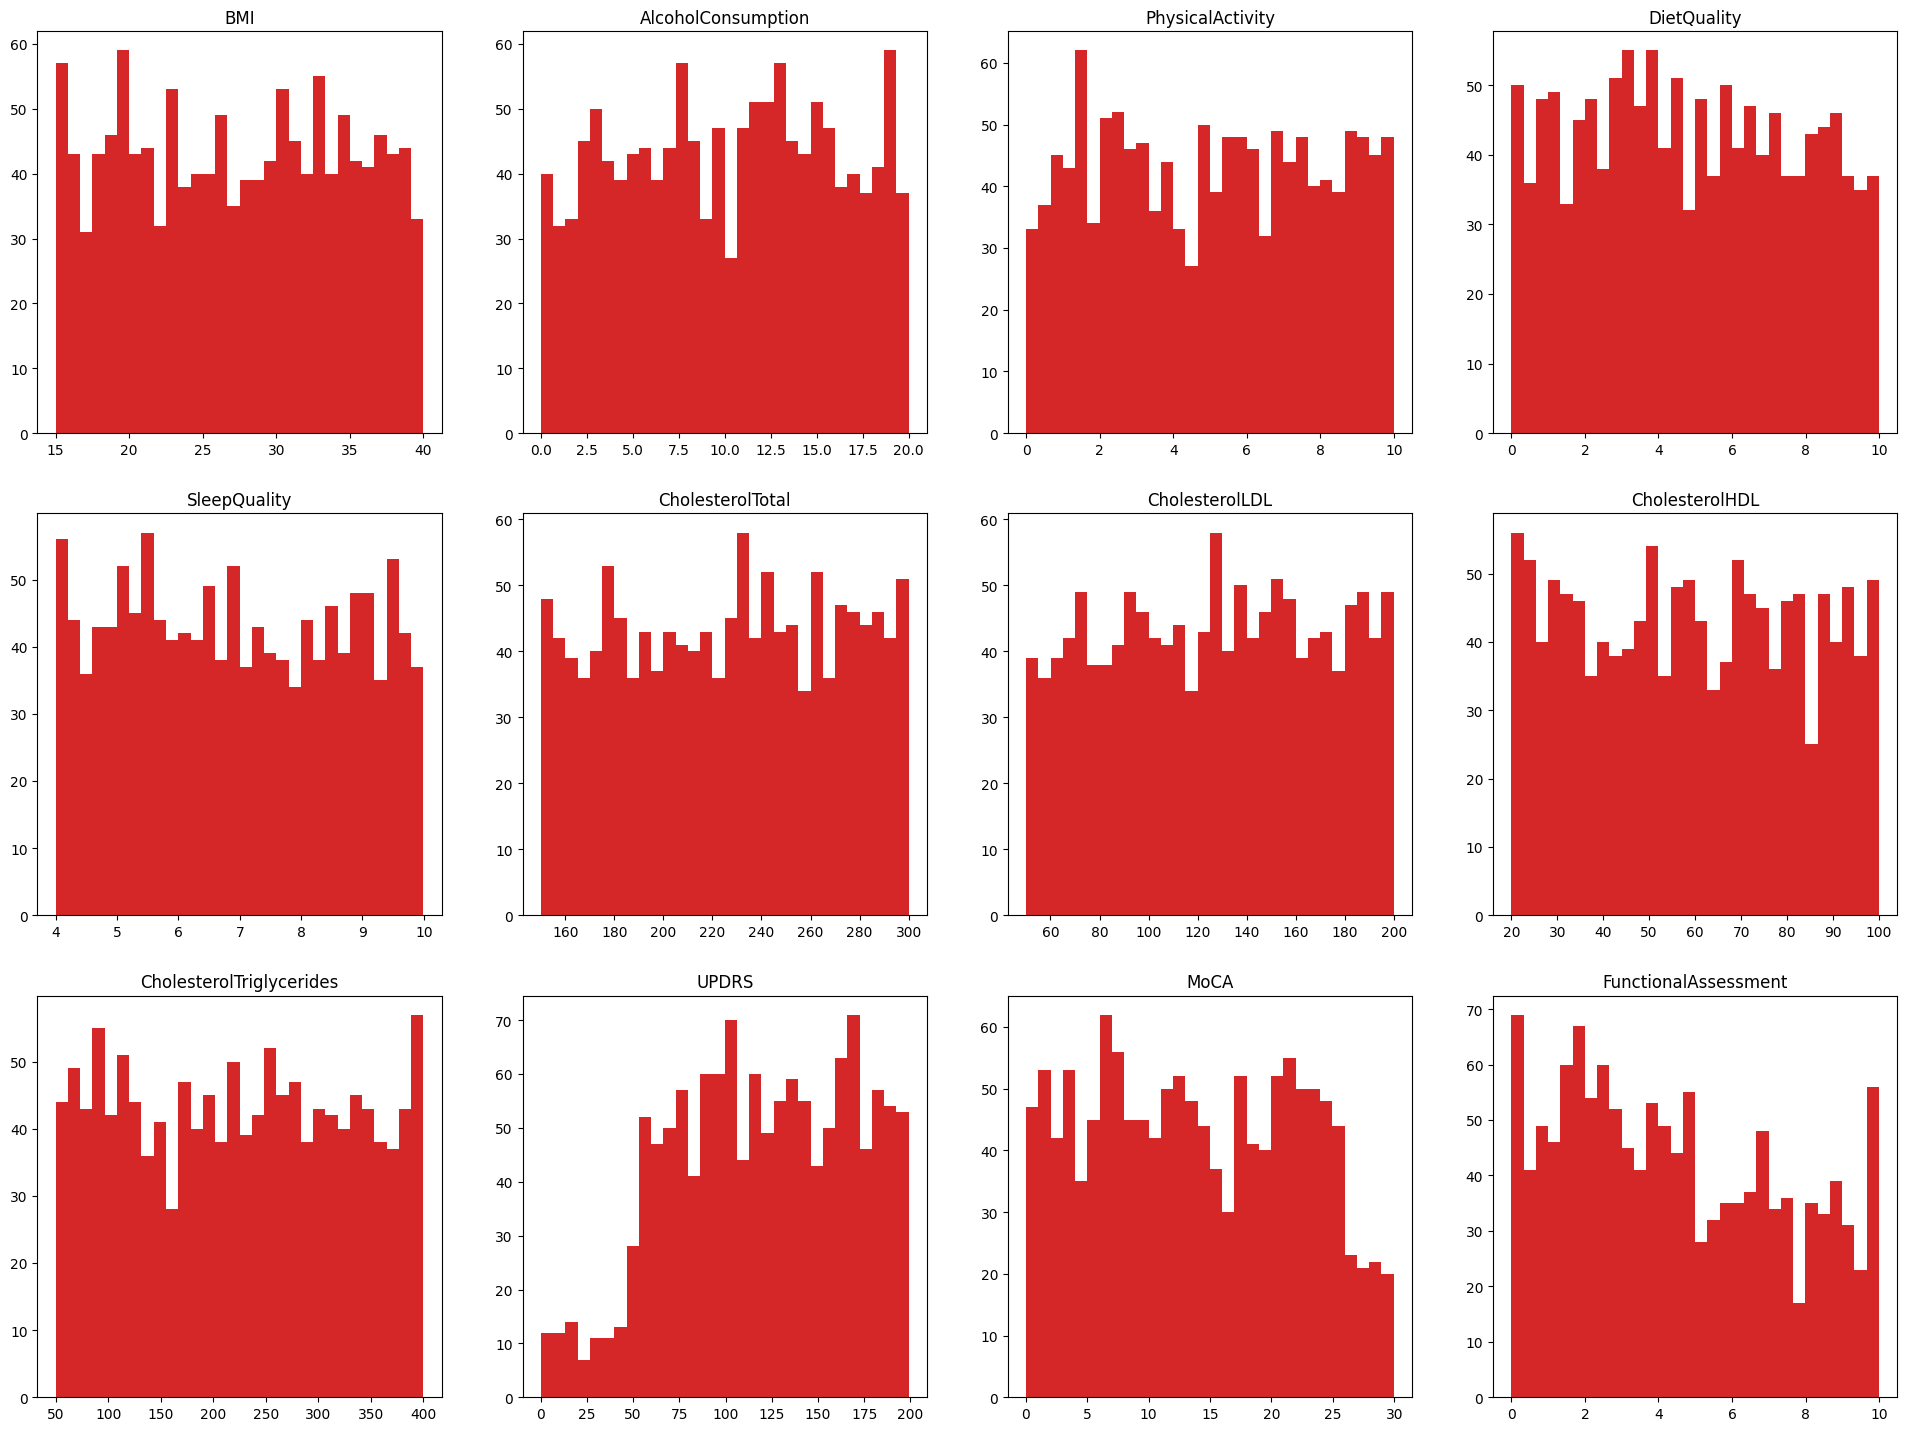

In [13]:
plt.figure(figsize=(24,24))
for x, i in enumerate(df_parkinson.select_dtypes('float')):
  plt.subplot(4, 4, x+1)
  #plt.hist(df_parkinson[i][df_parkinson['Diagnosis'] == 0], color='tab:green')
  plt.hist(df_parkinson[i][df_parkinson['Diagnosis'] == 1], color='tab:red', bins=30)
  plt.title(i)
plt.show()

# Overlayed

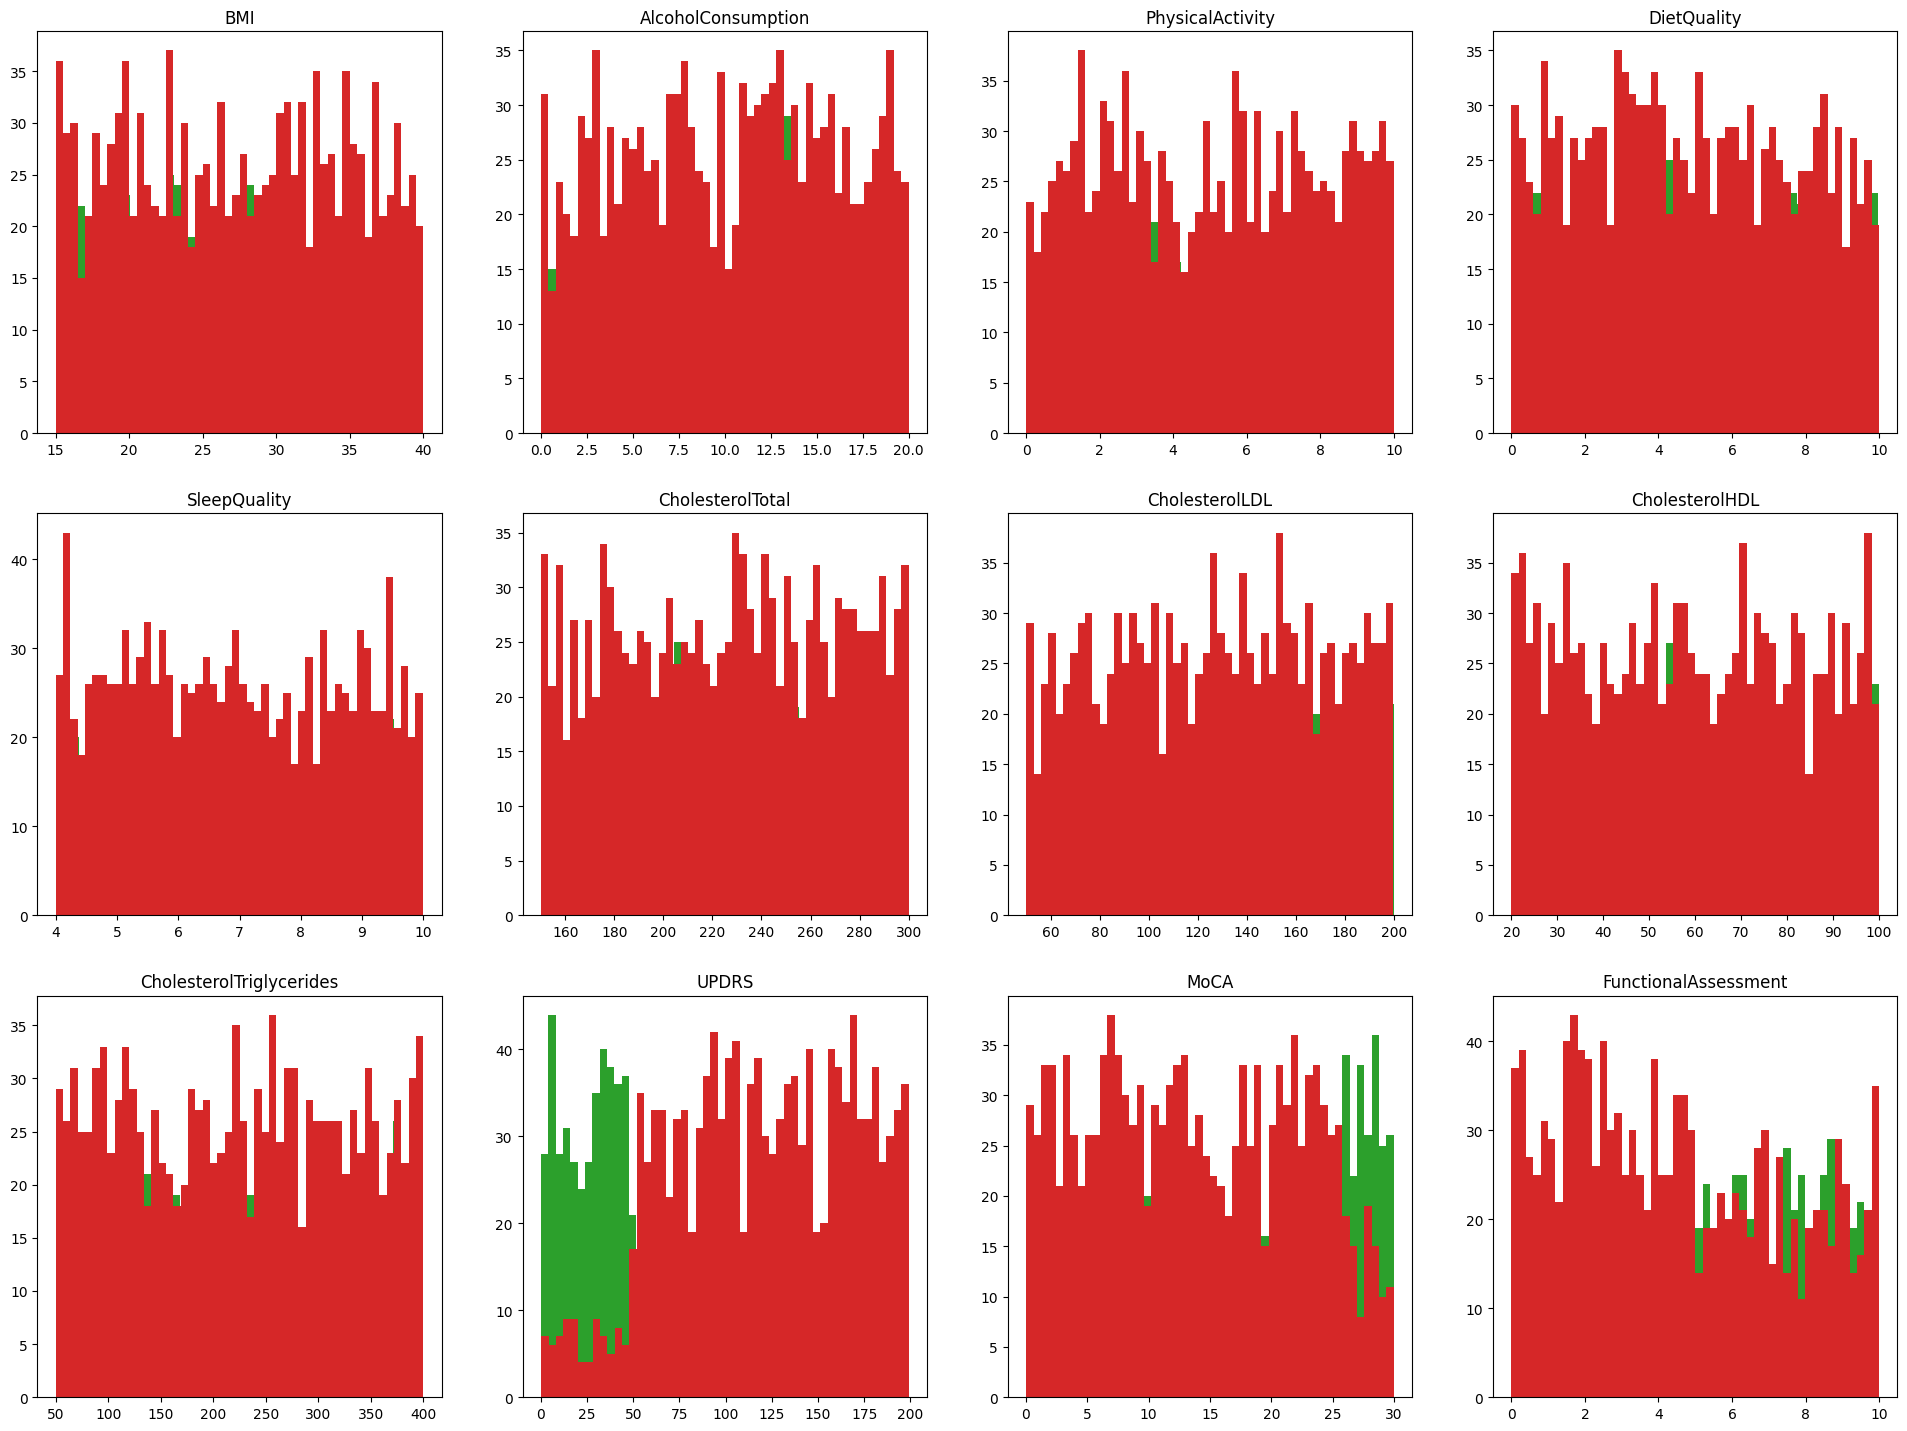

In [14]:
plt.figure(figsize=(24,24))
for x, i in enumerate(df_parkinson.select_dtypes('float')):
  plt.subplot(4, 4, x+1)
  plt.hist(df_parkinson[i][df_parkinson['Diagnosis'] == 0], color='tab:green', bins=50)
  plt.hist(df_parkinson[i][df_parkinson['Diagnosis'] == 1], color='tab:red', bins=50)
  plt.title(i)
plt.show()

# Model

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
del df_raw['PatientID']
del df_raw['DoctorInCharge']


In [17]:
df_raw.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0


In [18]:
df_raw['Ethnicity'] = df_raw['Ethnicity'].map({0:'Caucasian', 1:'AfricanAmerican', 2:'Asian', 3:'Other'})
df_raw['EducationLevel'] = df_raw['EducationLevel'].map({0: 'low', 1: 'High School', 2: 'Bachelor', 3: 'Higher'})
df_raw['BMI'] = pd.cut(df_raw['BMI'], bins=[15, 20, 27, 39], labels=['low', 'medium', 'high'])
df_raw['AlcoholConsumption'] = pd.cut(df_raw['AlcoholConsumption'], bins=[0, 5, 10, 15, 20], labels=['low', 'medium', 'high', 'very_high'])
df_raw['CholesterolLDL'] = pd.cut(df_raw['CholesterolLDL'], bins=[50, 88, 127, 163, 200], labels=['low', 'medium', 'high', 'very_high'])
df_raw['CholesterolTotal'] = pd.cut(df_raw['CholesterolTotal'], bins=[150, 189, 228, 264, 300], labels=['low', 'medium', 'high', 'very_high'])
df_raw['MoCA'] = pd.cut(df_raw['MoCA'], bins=[0, 7.5, 15, 22.6, 30], labels=['low', 'medium', 'high', 'very_high'])
df_raw['SleepQuality'] = pd.cut(df_raw['SleepQuality'], bins=[4, 5.5, 6.9, 8.5, 10], labels=['low', 'medium', 'high', 'very_high'])
df_raw['DietQuality'] = pd.cut(df_raw['DietQuality'], bins=[0, 2.5, 4.8, 7.4, 10], labels=['low', 'medium', 'high', 'very_high'])
df_raw['PhysicalActivity'] = pd.cut(df_raw['PhysicalActivity'], bins=[0, 2.5, 5, 7.5, 10], labels=['low', 'medium', 'high', 'very_high'])
#df_raw['UPDRS'] = pd.cut(df_raw['UPDRS'], bins=[0, 53, 102, 150, 200], labels=['low', 'medium', 'high', 'very_high'])
df_raw['Age'] = pd.cut(df_raw['Age'], bins=[50, 60, 70, 80, 90], labels=['low', 'medium', 'high', 'very_high'])
df_raw['CholesterolHDL'] = pd.cut(df_raw['CholesterolHDL'], bins=[20, 39, 59, 79, 100], labels=['low', 'medium', 'high', 'very_high'])
#df_raw['FunctionalAssessment'] = pd.cut(df_raw['FunctionalAssessment'], bins=[0, 2.5, 5, 7.5, 10], labels=['low', 'medium', 'high', 'very_high'])
df_raw['CholesterolTriglycerides'] = pd.cut(df_raw['CholesterolTriglycerides'], bins=[50, 132, 222, 311, 400], labels=['low', 'medium', 'high', 'very_high'])

In [19]:
df_raw.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,very_high,0,Other,High School,low,0,medium,low,medium,very_high,0,0,0,0,0,0,129,60,medium,high,low,very_high,6.458713,very_high,1.572427,1,0,0,0,0,0,0,0
1,high,0,Caucasian,Bachelor,low,1,medium,very_high,very_high,medium,0,0,0,0,0,0,163,76,medium,high,high,high,37.306703,medium,4.787551,0,1,0,1,0,1,0,1
2,medium,1,Caucasian,low,low,0,low,low,high,very_high,0,0,0,1,0,0,113,93,very_high,medium,very_high,very_high,67.838170,very_high,2.130686,1,0,0,0,1,0,1,1
3,low,0,Caucasian,low,low,0,medium,low,high,low,0,0,0,0,0,0,146,78,very_high,high,medium,very_high,52.964696,high,3.391288,1,1,1,0,0,0,1,1
4,very_high,0,Caucasian,High School,low,0,medium,low,medium,very_high,0,0,0,0,0,0,115,94,very_high,medium,low,medium,21.804880,medium,3.200969,0,0,0,1,0,1,0,0


In [20]:
df_raw['CholesterolTriglycerides'].describe()

,CholesterolTriglycerides
count,2105
unique,4
top,high
freq,533


In [21]:
print(df_raw['Ethnicity'].dtype)
print(df_raw['EducationLevel'].dtype)

object
object


In [22]:
df_raw.head(2)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,very_high,0,Other,High School,low,0,medium,low,medium,very_high,0,0,0,0,0,0,129,60,medium,high,low,very_high,6.458713,very_high,1.572427,1,0,0,0,0,0,0,0
1,high,0,Caucasian,Bachelor,low,1,medium,very_high,very_high,medium,0,0,0,0,0,0,163,76,medium,high,high,high,37.306703,medium,4.787551,0,1,0,1,0,1,0,1


In [23]:
df_raw = pd.get_dummies(df_raw, drop_first=True)

In [24]:
#df_raw = df_raw.astype('int')

In [25]:
df_raw.head(2)

,Gender,Smoking,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,UPDRS,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Age_medium,Age_high,Age_very_high,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_High School,EducationLevel_Higher,EducationLevel_low,BMI_medium,BMI_high,AlcoholConsumption_medium,AlcoholConsumption_high,AlcoholConsumption_very_high,PhysicalActivity_medium,PhysicalActivity_high,PhysicalActivity_very_high,DietQuality_medium,DietQuality_high,DietQuality_very_high,SleepQuality_medium,SleepQuality_high,SleepQuality_very_high,CholesterolTotal_medium,CholesterolTotal_high,CholesterolTotal_very_high,CholesterolLDL_medium,CholesterolLDL_high,CholesterolLDL_very_high,CholesterolHDL_medium,CholesterolHDL_high,CholesterolHDL_very_high,CholesterolTriglycerides_medium,CholesterolTriglycerides_high,CholesterolTriglycerides_very_high,MoCA_medium,MoCA_high,MoCA_very_high
0,0,0,0,0,0,0,0,0,129,60,6.458713,1.572427,1,0,0,0,0,0,0,0,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,0,1,0,0,0,0,0,0,163,76,37.306703,4.787551,0,1,0,1,0,1,0,1,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False


In [26]:
for i in df_raw.select_dtypes(include='bool'):
  df_raw[i] = df_raw[i].astype('int')

In [27]:
df_raw.head(2)

,Gender,Smoking,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,UPDRS,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Age_medium,Age_high,Age_very_high,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_High School,EducationLevel_Higher,EducationLevel_low,BMI_medium,BMI_high,AlcoholConsumption_medium,AlcoholConsumption_high,AlcoholConsumption_very_high,PhysicalActivity_medium,PhysicalActivity_high,PhysicalActivity_very_high,DietQuality_medium,DietQuality_high,DietQuality_very_high,SleepQuality_medium,SleepQuality_high,SleepQuality_very_high,CholesterolTotal_medium,CholesterolTotal_high,CholesterolTotal_very_high,CholesterolLDL_medium,CholesterolLDL_high,CholesterolLDL_very_high,CholesterolHDL_medium,CholesterolHDL_high,CholesterolHDL_very_high,CholesterolTriglycerides_medium,CholesterolTriglycerides_high,CholesterolTriglycerides_very_high,MoCA_medium,MoCA_high,MoCA_very_high
0,0,0,0,0,0,0,0,0,129,60,6.458713,1.572427,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,163,76,37.306703,4.787551,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [28]:
res = df_raw.corr()['Diagnosis'].sort_values(ascending=False) \
 [(df_raw.corr()['Diagnosis'].sort_values(ascending=False) > 0.1) | (df_raw.corr()['Diagnosis'].sort_values(ascending=False) < -0.05 )]
res

,Diagnosis
Diagnosis,1.000000
UPDRS,0.398006
Tremor,0.274370
Rigidity,0.185611
Bradykinesia,0.184042
PosturalInstability,0.147519
MoCA_very_high,-0.178506
FunctionalAssessment,-0.225036


In [29]:
res_c = df_raw.cov()['Diagnosis'].sort_values(ascending=False) \
 [(df_raw.cov()['Diagnosis'].sort_values(ascending=False) > 0.1) | (df_raw.cov()['Diagnosis'].sort_values(ascending=False) < -0.1 )]
res_c

,Diagnosis
UPDRS,10.938227
Diagnosis,0.235837
DiastolicBP,-0.240896
FunctionalAssessment,-0.320627


In [30]:
len(res) - 1

7

In [31]:
# idx = res.index.tolist() + ['DiastolicBP'] #👈👈👈👈👈👈
# print(idx)

In [32]:
data = df_raw[res.index].copy()
target = data.pop('Diagnosis') # 👈👈👈✨

In [33]:
data.head()

,UPDRS,Tremor,Rigidity,Bradykinesia,PosturalInstability,MoCA_very_high,FunctionalAssessment
0,6.458713,1,0,0,0,1,1.572427
1,37.306703,0,1,0,1,0,4.787551
2,67.838170,1,0,0,0,1,2.130686
3,52.964696,1,1,1,0,0,3.391288
4,21.804880,0,0,0,1,0,3.200969


In [34]:
print(data.shape)
print(target.shape)

(2105, 7)
(2105,)


In [35]:
scaler = StandardScaler()
data_scal = scaler.fit_transform(data) # 👈👈👈✨

In [36]:
len(data_scal[0])

7

In [37]:
print(data_scal.shape)
print(target.shape)

(2105, 7)
(2105,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_scal, target, test_size=0.25, random_state=42, stratify=target)

# Model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.activations import linear, sigmoid, relu, tanh, gelu, softmax, silu, swish

In [51]:
model = Sequential()
model.add(Dense(units=526, activation='relu', input_shape=(len(data_scal[0]), )))
model.add(Dense(units=64, activation='swish'))
model.add(Dropout(0.001))
# model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop',  # rmsprop lion adam
              loss='binary_crossentropy',
              metrics=['accuracy', 'auc'])   #'accuracy'

history = model.fit(X_train, y_train, epochs=18, batch_size=30, validation_split=0.3, verbose=1)

Epoch 1/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7563 - auc: 0.8334 - loss: 0.5194 - val_accuracy: 0.8270 - val_auc: 0.9009 - val_loss: 0.4019
Epoch 2/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - auc: 0.9146 - loss: 0.3617 - val_accuracy: 0.8460 - val_auc: 0.9111 - val_loss: 0.3779
Epoch 3/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8451 - auc: 0.9308 - loss: 0.3270 - val_accuracy: 0.8608 - val_auc: 0.9147 - val_loss: 0.3731
Epoch 4/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8842 - auc: 0.9399 - loss: 0.3004 - val_accuracy: 0.8586 - val_auc: 0.9171 - val_loss: 0.3736
Epoch 5/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8898 - auc: 0.9492 - loss: 0.2747 - val_accuracy: 0.8608 - val_auc: 0.9162 - val_loss: 0.3750
Epoch 6/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8992 - auc: 0.9477 - loss: 0.2838 - val_accuracy: 0.8397 - val_auc: 0.9149 - val_loss: 0.3753
Epoch 7/18
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step -

In [52]:
metrics = history.history
metrics.keys()

dict_keys(['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss'])

In [53]:
test_loss, test_accuracy, auc = model.evaluate(X_test, y_test, verbose=0)
print(round(test_loss, 2))
print(round(test_accuracy, 3))
print(round(auc, 2))

0.29
0.911
0.95


#😊